In [1]:
# Data Manuiplation dependencies
# https://numpy.org/
import numpy as np
# https://pandas.pydata.org/
import pandas as pd 
#----------------------------------
# Visualisations dependencies
# https://matplotlib.org/
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D 
#https://seaborn.pydata.org/
import seaborn as sns
#-------------------------------------
import warnings
import itertools
import os
#--------------------------------
sns.set(style="darkgrid")
# Modelling dependencies
#sklearn Dependencies
# All dependencies can be found here https://scikit-learn.org/stable/
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import kstest
import scipy.stats as stats

#-----------------------------------------------------------------------
# pathing
from project_root import get_project_root
root = get_project_root()

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

# Ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 90) # display all column of dataframe
pd.set_option('display.max_row', 100)
pd.set_option('display.max_colwidth', -1) 
#-----------------------------------------------------------------------

# Table of Contents

    * EDA
    
    * Correlation Map
     
    * Splitting and standardizing data for analysis
    
    * Mutual Feature Selection

    * Random Forest Model with Test Data
    
    * Random Forest Model with Validation Data
       
    * Random Forest Feature selection
        
    * Logistic Model with Test Data

    * Logistic Model with Validation Data
    
    * Logistic Feature selection
    
    * Gradient Boosting Model with Test Data     

    * Gradient Boosting Model with Validation Data
    
    * Gradient Boosting Feature selection
    
    * AdaBoosting Model with Test Data     

    * AdaBoosting Model with Validation Data
    
    * AdaBoosting Feature selection
    
    * Comparing Features
    
    * Statistical Test
    
    * Chi Square test for cateogorical data
    
    * Kolmogorov–Smirnov Test for Normality
    
    * Leven Test for Equality of Variance 
    
    * Krskal-Wallis H-Test for non-parametric Version of ANOVA
    

# EDA 

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)        


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [4]:
# import data and clean it
#df = pd.read_csv(root / '1.Data' / 'Covariate_Features.csv')
df = pd.read_csv('Covariate_Features.csv')
df.drop(['long','lat','Coordinates','Transformed_Long','Transformed_Lat','new_long','new_lat','Raster Value'],axis=1,inplace=True)
print('there are', df.shape[1], 'columns in the original dataframe')
print('there are', df.shape[0],'values in the original dataframe')
df.head()

there are 62 columns in the original dataframe
there are 47560 values in the original dataframe


Label     Band_1    Band_2    Band_3    Band_4    Band_5     Band_6  \
0  0      31.780069  0.739527  0.724089  2.688592  4.286776  11.415614   
1  0      31.813374  0.994895  0.985522  2.950744  4.480880  11.294726   
2  0      31.773357  0.926415  0.917783  2.884460  4.443317  11.304877   
3  0      31.735663  0.866177  0.854744  2.819666  4.407386  11.315222   
4  0      31.698177  0.811470  0.797522  2.756468  4.373125  11.326365   

     Band_7    Band_8  Band_9  Band_10    Band_11  Band_12   Band_13  Band_14  \
0  1.205231  2.369100  0.0     0.583    18.129000  12.066   2.265071  0.0       
1  1.439247  2.656430  0.0     0.825    18.056999  12.357   1.786768  0.0       
2  1.349879  2.575939  0.0     0.743    18.049999  12.268   2.265071  0.0       
3  1.260993  2.496295  0.0     0.651    18.042999  12.179   2.265071  0.0       
4  1.172700  2.417583  0.0     0.560    18.035999  12.089   2.265071  0.0       

    Band_15     Band_16    Band_17  Band_18    Band_19  Band_20    Band_21  \
0  0.286720  103.370560  20.921000  0.464    81.175003 -0.371    29.035999   
1  0.289738  103.442802  21.132000  0.414    80.906998 -0.293    29.257999   
2  0.288260  103.370560  21.089001  0.382    80.999001 -0.278    29.172001   
3  0.286658  103.370560  21.046000  0.371    81.091003 -0.278    29.087000   
4  0.284906  103.370560  21.003000  0.371    81.182999 -0.278    29.000999   

   Band_22    Band_23   Band_24  Band_25    Band_26  Band_27  Band_28  \
0  0.586    56.499001  0.646436  12.738   93.734001  10.195   0.0       
1  0.464    56.410999  0.692578  13.023   93.463997  10.131   0.0       
2  0.464    56.409000  0.636535  12.944   93.533997  10.178   0.0       
3  0.473    56.408001  0.592647  12.864   93.603996  10.226   0.0       
4  0.499    56.407001  0.559894  12.785   93.674004  10.274   0.0       

    Band_29  Band_30  Band_31  Band_32    Band_33   Band_34    Band_35  \
0  0.263034  3.0      126.0    20.0     34.562562  0.852259  14.920146   
1  0.263034  3.0      126.0    80.0     34.557776  0.839812  14.818560   
2  0.263034  3.0      50.0     80.0     34.558058  0.388908  14.822458   
3  0.263034  3.0      50.0     80.0     34.558058  0.560225  14.828402   
4  0.263034  3.0      50.0     20.0     34.558058  0.730593  14.847874   

   Band_36   Band_37    Band_38   Band_39   Band_40   Band_41   Band_42  \
0  4.0      0.000000  0.000000   0.869017  0.272429  0.690633  0.734774   
1  1.0      0.000000  0.000000   0.868700  0.271277  0.686508  0.734642   
2  1.0      0.000000  0.000000   0.868858  0.271756  0.688595  0.734720   
3  4.0      4.902162  13.694674  0.868858  0.271756  0.688595  0.734720   
4  6.0      0.000000  0.000000   0.869017  0.272429  0.690633  0.734774   

    Band_43   Band_44   Band_45   Band_46   Band_47   Band_48    Band_49  \
0  0.995996  0.517588  0.766863  0.585417  0.136775  0.233711  9.869781    
1  0.993765  0.515353  0.763166  0.585874  0.140325  0.231277  10.191885   
2  0.995055  0.516355  0.765130  0.585677  0.138392  0.231277  10.895460   
3  0.995055  0.516355  0.765130  0.585677  0.138392  0.232287  11.379321   
4  0.995996  0.517588  0.766863  0.585417  0.136775  0.232287  11.595043   

    Band_50   Band_51   Band_52   Band_53    Band_54    Band_55  Band_56  \
0  0.231839  0.568856  0.774400  2.789958  20.956160  19.635271  3.0       
1  0.232168  0.569326  0.772752  3.045210  20.672230  19.538315  3.0       
2  0.231948  0.569111  0.772752  2.977921  20.761681  19.540298  3.0       
3  0.231948  0.569111  0.772752  2.917063  20.851133  19.542603  3.0       
4  0.231839  0.568856  0.774400  2.857528  20.945560  19.545317  3.0       

   Band_57  Band_58     Band_59   Band_60  Band_61  
0  1.0      0.0      0.000000    0.409060 -1.0      
1  1.0      0.0      0.000000    0.405172 -1.0      
2  1.0      0.0      0.000000    0.407236 -1.0      
3  1.0      2.0      235.674698  0.407236  0.0      
4  1.0      0.0      0.000000    0.409060 -1.0

In [5]:
df.rename(columns= {'Band_1': ' fs_dist_fs_2020',
 'Band_2': ' fs_dist_hf_2019',
 'Band_3': ' fs_dist_hf1_2020',
 'Band_4': ' fs_dist_market_2020',
 'Band_5': ' fs_dist_mosques_2017',
 'Band_6': ' fs_dist_school_2020',
 'Band_7': ' fs_dist_school1_2018',
 'Band_8': ' fs_dist_well_2018',
 'Band_9': ' fs_electric_dist_2020',
 'Band_10': ' in_dist_rd_2016',
 'Band_11': ' in_dist_rd_intersect_2016',
 'Band_12': ' in_dist_waterway_2016',
 'Band_13': ' in_night_light_2016',
 'Band_14': ' ph_base_water_2010',
 'Band_15': ' ph_bio_dvst_2015',
 'Band_16': ' ph_climate_risk_2020',
 'Band_17': ' ph_dist_aq_veg_2015',
 'Band_18': ' ph_dist_art_surface_2015',
 'Band_19': ' ph_dist_bare_2015',
 'Band_20': ' ph_dist_cultivated_2015',
 'Band_21': ' ph_dist_herb_2015',
 'Band_22': ' ph_dist_inland_water_2018',
 'Band_23': ' ph_dist_open_coast_2020',
 'Band_24': ' ph_dist_riv_network_2007',
 'Band_25': ' ph_dist_shrub_2015',
 'Band_26': ' ph_dist_sparse_veg_2015',
 'Band_27': ' ph_dist_woody_tree_2015',
 'Band_28': ' ph_gdmhz_2005',
 'Band_29': ' ph_grd_water_2000',
 'Band_30': ' ph_hzd_index_2011',
 'Band_31': ' ph_land_c1_2019',
 'Band_32': ' ph_land_c2_2020',
 'Band_33': ' ph_max_tem_2019',
 'Band_34': ' ph_ndvi_2019',
 'Band_35': ' ph_pm25_2016',
 'Band_36': ' ph_slope_2000',
 'Band_37': ' po_pop_fb_2018',
 'Band_38': ' po_pop_un_2020',
 'Band_39': ' ses_an_visits_2016',
 'Band_40': ' ses_child_stunted_2018',
 'Band_41': ' ses_dpt3_2018',
 'Band_42': ' ses_hf_delivery_2018',
 'Band_43': ' ses_impr_water_src_2016',
 'Band_44': ' ses_ITN_2016',
 'Band_45': ' ses_m_lit_2018',
 'Band_46': ' ses_measles_2018',
 'Band_47': ' ses_odef_2018',
 'Band_48': ' ses_pfpr_2017',
 'Band_49': ' ses_preg_2017',
 'Band_50': ' ses_unmet_need_2018',
 'Band_51': ' ses_w_anemia_2018',
 'Band_52': ' ses_w_lit_2018',
 'Band_53': ' sh_dist_conflict_2020',
 'Band_54': ' sh_dist_mnr_pofw_2019',
 'Band_55': ' sh_dist_pofw_2019',
 'Band_56': ' sh_ethno_den_2020',
 'Band_57': ' sh_pol_relev_ethnic_gr_2019',
 'Band_58': ' uu_bld_count_2020',
 'Band_59': ' uu_bld_den_2020',
 'Band_60': ' uu_impr_housing_2015',
 'Band_61': ' uu_urb_bldg_2018'},inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head()
#df.to_csv('Covariates_w_names.csv',index=False)

Label   fs_dist_fs_2020   fs_dist_hf_2019   fs_dist_hf1_2020  \
0  0      31.780069         0.739527          0.724089            
1  0      31.813374         0.994895          0.985522            
2  0      31.773357         0.926415          0.917783            
3  0      31.735663         0.866177          0.854744            
4  0      31.698177         0.811470          0.797522            

    fs_dist_market_2020   fs_dist_mosques_2017   fs_dist_school_2020  \
0  2.688592              4.286776               11.415614              
1  2.950744              4.480880               11.294726              
2  2.884460              4.443317               11.304877              
3  2.819666              4.407386               11.315222              
4  2.756468              4.373125               11.326365              

    fs_dist_school1_2018   fs_dist_well_2018   fs_electric_dist_2020  \
0  1.205231               2.369100            0.0                      
1  1.439247               2.656430            0.0                      
2  1.349879               2.575939            0.0                      
3  1.260993               2.496295            0.0                      
4  1.172700               2.417583            0.0                      

    in_dist_rd_2016   in_dist_rd_intersect_2016   in_dist_waterway_2016  \
0  0.583             18.129000                   12.066                   
1  0.825             18.056999                   12.357                   
2  0.743             18.049999                   12.268                   
3  0.651             18.042999                   12.179                   
4  0.560             18.035999                   12.089                   

    in_night_light_2016   ph_base_water_2010   ph_bio_dvst_2015  \
0  2.265071              0.0                  0.286720            
1  1.786768              0.0                  0.289738            
2  2.265071              0.0                  0.288260            
3  2.265071              0.0                  0.286658            
4  2.265071              0.0                  0.284906            

    ph_climate_risk_2020   ph_dist_aq_veg_2015   ph_dist_art_surface_2015  \
0  103.370560             20.921000             0.464                       
1  103.442802             21.132000             0.414                       
2  103.370560             21.089001             0.382                       
3  103.370560             21.046000             0.371                       
4  103.370560             21.003000             0.371                       

    ph_dist_bare_2015   ph_dist_cultivated_2015   ph_dist_herb_2015  \
0  81.175003          -0.371                     29.035999            
1  80.906998          -0.293                     29.257999            
2  80.999001          -0.278                     29.172001            
3  81.091003          -0.278                     29.087000            
4  81.182999          -0.278                     29.000999            

    ph_dist_inland_water_2018   ph_dist_open_coast_2020  \
0  0.586                       56.499001                  
1  0.464                       56.410999                  
2  0.464                       56.409000                  
3  0.473                       56.408001                  
4  0.499                       56.407001                  

    ph_dist_riv_network_2007   ph_dist_shrub_2015   ph_dist_sparse_veg_2015  \
0  0.646436                   12.738               93.734001                  
1  0.692578                   13.023               93.463997                  
2  0.636535                   12.944               93.533997                  
3  0.592647                   12.864               93.603996                  
4  0.559894                   12.785               93.674004                  

    ph_dist_woody_tree_2015   ph_gdmhz_2005   ph_grd_water_2000  \
0  10.195                    0.0             0.263034             
1  10.131                 

Label
0    555.897354 
1    4331.337007
2    57.948254  
Name:  uu_bld_den_2020, dtype: float64


<Figure size 432x288 with 0 Axes>

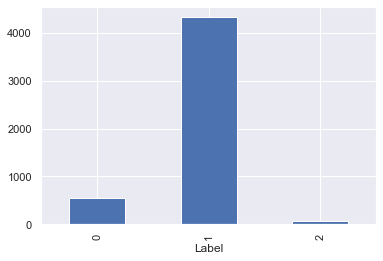

<Figure size 432x288 with 0 Axes>

In [6]:
print(df.groupby('Label').mean()[' uu_bld_den_2020'])
df.groupby('Label').mean()[' uu_bld_den_2020'].plot(kind='bar')
plt.figure()

In [7]:
# create pie chart data
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
2  32089  67.47     
0  15202  31.96     
1  269    0.57

<function matplotlib.pyplot.show(close=None, block=None)>

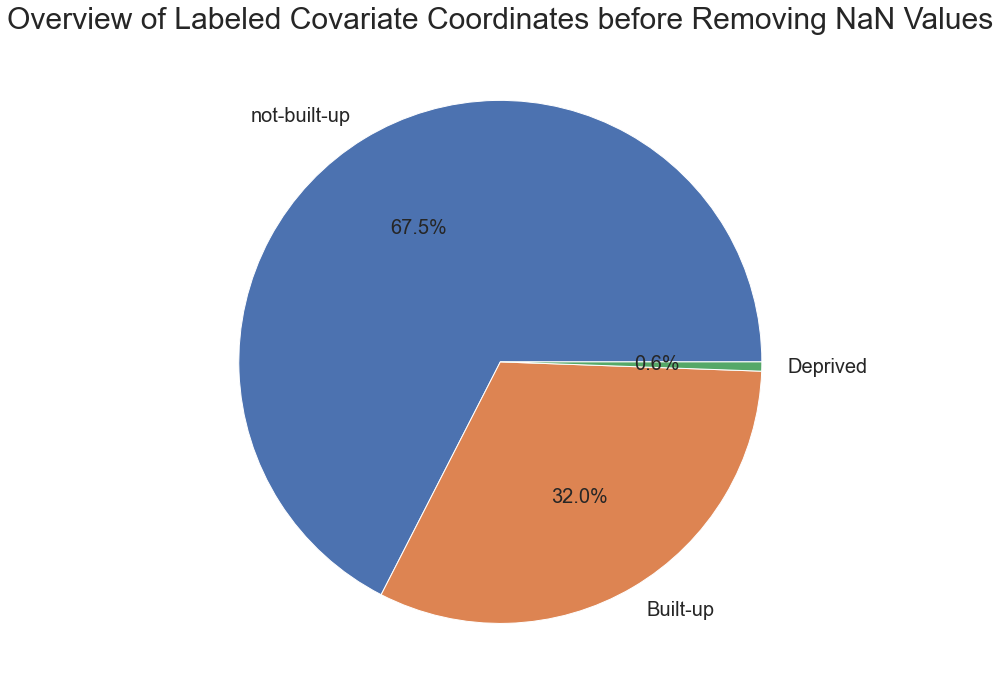

In [8]:
plt.figure(figsize=(10,10))
labels = ['not-built-up','Built-up', 'Deprived']
plt.title('Overview of Labeled Covariate Coordinates before Removing NaN Values', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [9]:
#checking NAN on Covariate data values
null_values = df[df.isnull().any(axis=1)]
print('there are',df[df.isnull().any(axis=1)].shape[0], 'nan values in the dataframe')
print(null_values['Label'].value_counts())
df.dropna(inplace=True)
# removed Band 28 as there were nan values
df.drop([' ph_gdmhz_2005'], axis=1,inplace = True)

print('there are ',df.shape[0],'rows of data after removing nan values')

there are 1987 nan values in the dataframe
2    1986
0    1   
Name: Label, dtype: int64
there are  45573 rows of data after removing nan values


In [10]:
nan_values = pd.DataFrame(null_values.index,columns=['index_values'])
nan_values.to_csv('covariate_null_values.csv',index=False)

In [11]:
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
2  30103  66.05     
0  15201  33.36     
1  269    0.59

<function matplotlib.pyplot.show(close=None, block=None)>

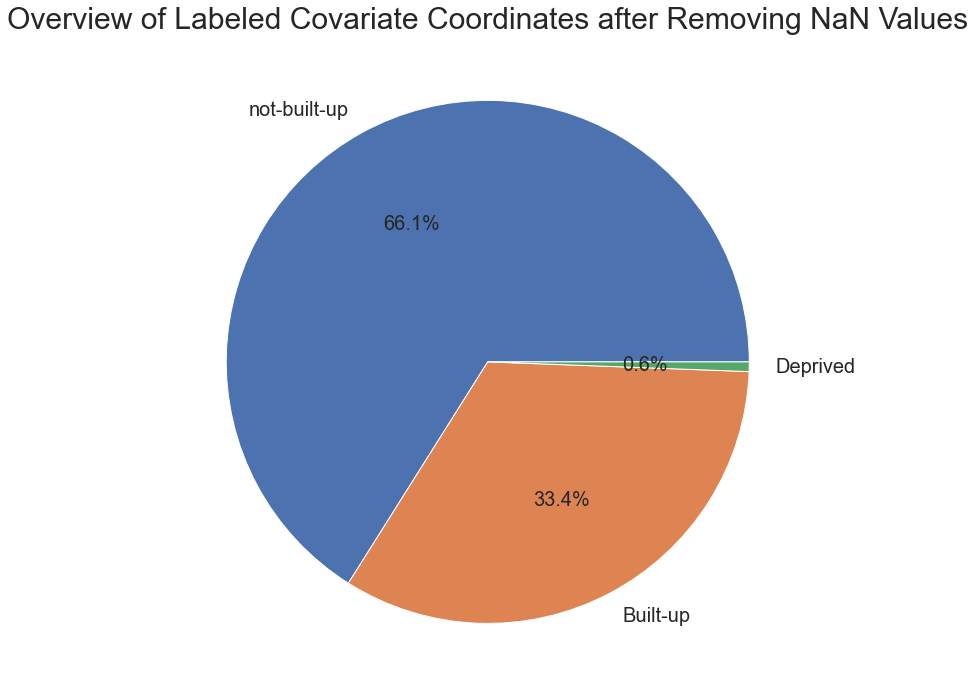

In [12]:
plt.figure(figsize=(10,10))
labels = ['not-built-up','Built-up', 'Deprived']
plt.title('Overview of Labeled Covariate Coordinates after Removing NaN Values', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [13]:
#heat map on Covariate Features
plt.figure(figsize=(150, 150))
plt.title('Correlation Heat Map of Covariate Features\n', fontsize= 250)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='YlOrRd', square=True)
plt.tight_layout()
plt.show()

In [14]:
df.corr()

Label   fs_dist_fs_2020   fs_dist_hf_2019  \
Label                         1.000000  0.227461          0.113430           
 fs_dist_fs_2020              0.227461  1.000000          0.314958           
 fs_dist_hf_2019              0.113430  0.314958          1.000000           
 fs_dist_hf1_2020             0.211404  0.603857          0.580779           
 fs_dist_market_2020          0.090035  0.664599          0.493962           
 fs_dist_mosques_2017         0.124437  0.422833          0.359400           
 fs_dist_school_2020          0.021028  0.775234          0.355180           
 fs_dist_school1_2018         0.238273  0.611216          0.329113           
 fs_dist_well_2018            0.077018  0.512606          0.427106           
 fs_electric_dist_2020       -0.258808 -0.480632         -0.273614           
 in_dist_rd_2016              0.320782  0.276859          0.383184           
 in_dist_rd_intersect_2016    0.043532  0.442181          0.428223           
 in_dist_waterway_2016        0.076301  0.220667          0.397608           
 in_night_light_2016         -0.574696 -0.428520         -0.316884           
 ph_base_water_2010          -0.215068 -0.369510         -0.053208           
 ph_bio_dvst_2015             0.064289  0.189605          0.096795           
 ph_climate_risk_2020        -0.215056 -0.030368          0.017621           
 ph_dist_aq_veg_2015          0.168052  0.237141          0.208310           
 ph_dist_art_surface_2015     0.504159  0.729663          0.389028           
 ph_dist_bare_2015            0.107289  0.729696          0.148187           
 ph_dist_cultivated_2015     -0.560532 -0.484008         -0.441899           
 ph_dist_herb_2015            0.295466  0.798182          0.265353           
 ph_dist_inland_water_2018    0.257449  0.145050          0.333220           
 ph_dist_open_coast_2020      0.333095  0.239830          0.079510           
 ph_dist_riv_network_2007    -0.473525 -0.058193         -0.081283           
 ph_dist_shrub_2015           0.278535  0.682965          0.195290           
 ph_dist_sparse_veg_2015      0.164407  0.770080          0.177265           
 ph_dist_woody_tree_2015     -0.541061 -0.307417         -0.305708           
 ph_grd_water_2000            0.151766  0.162843          0.117032           
 ph_hzd_index_2011           -0.217705 -0.346001         -0.346768           
 ph_land_c1_2019              0.736969  0.237596          0.122271           
 ph_land_c2_2020             -0.809559 -0.247704         -0.139487           
 ph_max_tem_2019              0.097808  0.523833          0.053475           
 ph_ndvi_2019                 0.848721  0.245264          0.151632           
 ph_pm25_2016                -0.052358  0.417152          0.083879           
 ph_slope_2000                0.069487  0.111091          0.058996           
 po_pop_fb_2018              -0.397467 -0.298920         -0.294091           
 po_pop_un_2020              -0.384143 -0.294825         -0.292877           
 ses_an_visits_2016           0.269946 -0.250368         -0.095151           
 ses_child_stunted_2018       0.380516  0.796349          0.221021           
 ses_dpt3_2018               -0.214768 -0.786788         -0.444474           
 ses_hf_delivery_2018        -0.100114 -0.666177         -0.316195           
 ses_impr_water_src_2016     -0.067387 -0.869754         -0.264108           
 ses_ITN_2016                 0.240630  0.676703          0.384549           
 ses_m_lit_2018              -0.162401 -0.805701         -0.413231           
 ses_measles_2018            -0.312409 -0.788535         -0.498975           
 ses_odef_2018                0.106656  0.788226          0.318301           
 ses_pfpr_2017                0.289386  0.917731          0.202201           
 ses_preg_2017               -0.468845 -0.400788         -0.380202           
 ses_unmet_need_2018          0.500858  0.567834          0.314794           
 ses_w_anemia_2018            0.351357  0.728955       

In [15]:
# recognized values had high correlation with each other
df[[' sh_pol_relev_ethnic_gr_2019',' uu_urb_bldg_2018']].corr()

sh_pol_relev_ethnic_gr_2019   uu_urb_bldg_2018
 sh_pol_relev_ethnic_gr_2019  1.00000                      -0.11626          
 uu_urb_bldg_2018            -0.11626                       1.00000

In [16]:
# decided to remove uu_urb_bld_2018 as it had a lower average correlation with values than did sh_pol_relev_ethnic_gr_2019
ex = df.corr()
print(ex[[' sh_pol_relev_ethnic_gr_2019',' uu_urb_bldg_2018']].mean())

#df = df.drop(' uu_urb_bldg_2018', axis =1)
df.shape


 sh_pol_relev_ethnic_gr_2019    0.053188
 uu_urb_bldg_2018              -0.018229
dtype: float64


(45573, 61)

In [17]:
# create dataframe 'df_corr' of all correlation values
# correlation values on for 0 and 1
df_corr =df[df['Label'].isin([0,1])]

In [18]:
# remove 'label' column from correlation datafram
df_corr = df_corr.drop('Label',axis=1)
print(df_corr.shape)
# unstack correlation matrix
correlation = pd.DataFrame(df_corr.corr().unstack().sort_values(ascending=False).reset_index())
# remove rows that are correlated with themselves as the correlation values would be 1
corr = correlation.loc[lambda x : x['level_0'] != x['level_1']].reset_index(drop=True)
# rename correlation row
corr = corr.rename(columns={0: 'Correlation_Values'})
corr.sort_values(by = 'level_0',ascending=False).reset_index()
corr.drop_duplicates(subset='Correlation_Values',inplace=True)
# remove every odd numbered index as it is the same value of the even cell above it
print('the skew of the correlation coefficient values for covariate features is', corr.skew())
corr.shape

(15470, 60)
the skew of the correlation coefficient values for covariate features is Correlation_Values    0.017183
dtype: float64


(1770, 3)

<Figure size 1080x720 with 0 Axes>

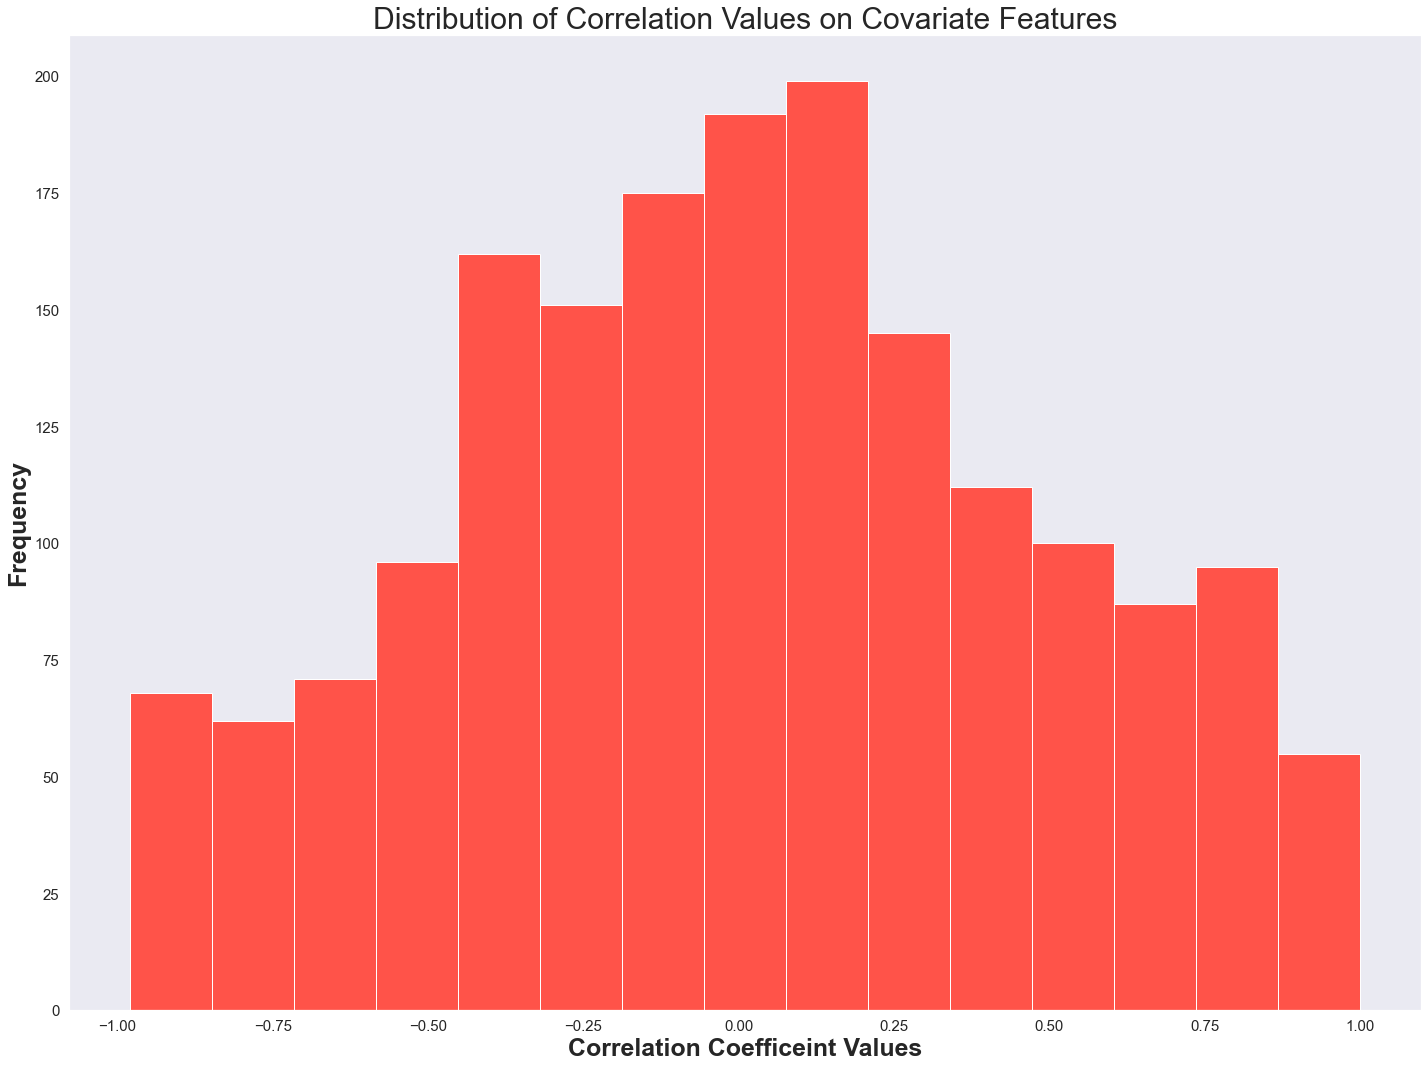

In [19]:
#created Histogram of Correlation Values
plt.figure(figsize= (15,10), facecolor='white')
plt.rcParams["figure.figsize"] = (20,15)
corr.plot(kind='hist',bins=15, color ='#ff5349')
plt.title('Distribution of Correlation Values on Covariate Features',fontsize=30)
plt.xlabel('Correlation Coefficeint Values',fontsize=25)
plt.ylabel('Frequency',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(False)
plt.legend().remove()
#plt.style.use('classic')
plt.tight_layout()
plt.show()

In [20]:
# created function that creates histogram of correlation coefficients of data
def distribution_hist(data,title=''):
        correlation = pd.DataFrame(data.corr().unstack().sort_values(ascending=False).reset_index())
        corr = correlation.loc[lambda x : x['level_0'] != x['level_1']].reset_index(drop=True)
        corr = corr.rename(columns={0: 'Correlation_Values'})
        corr.sort_values(by = 'level_0',ascending=False).reset_index()
        corr.drop_duplicates(subset='Correlation_Values',inplace=True)
        print('the skew of the correlation coefficient values for covariate features is', corr.skew())
        plt.figure(figsize= (15,10), facecolor='white')
        plt.rcParams["figure.figsize"] = (20,15)
        corr.plot(kind='hist',bins=15, color ='#ff5349')
        plt.title('Distribution of Correlation Values ' + title,fontsize=30)
        plt.xlabel('Correlation Coefficeint Values',fontsize=25)
        plt.ylabel('Frequency',fontsize=25)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.grid(False)
        plt.legend().remove()
        plt.tight_layout()
        plt.show()

# Splitting and standardizing data for analysis

In [21]:
# Make directory to save results 
directory = os.path.dirname('result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [22]:
# select 0 and 1 classes
df =df[df['Label'].isin([0,1])]


In [23]:
X = df.drop('Label', axis=1)
y = df['Label']
# train, val, test split 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [24]:
# create pie chart data
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
0  15201  98.26     
1  269    1.74

<function matplotlib.pyplot.show(close=None, block=None)>

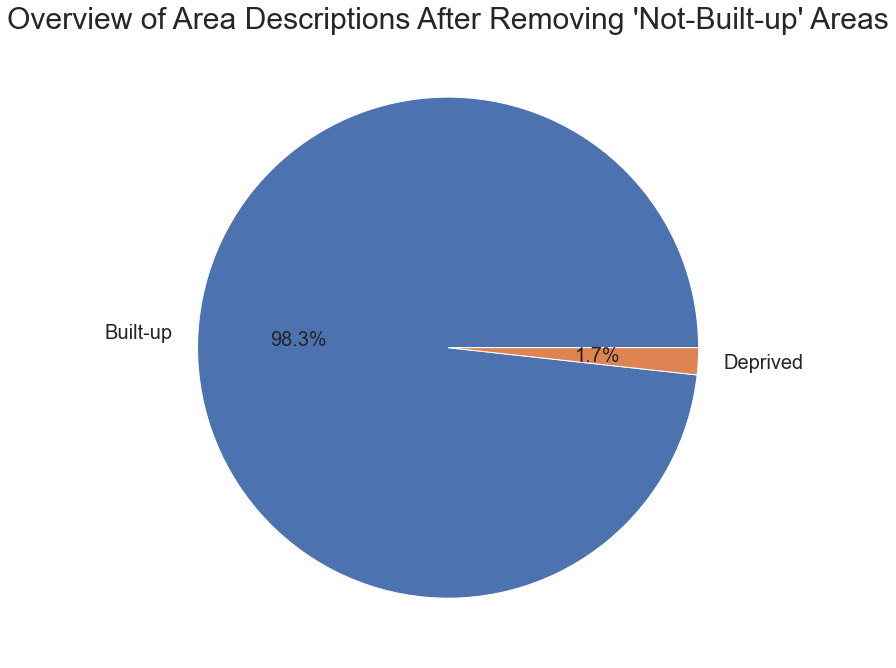

In [25]:
#created Pie chart after removing Not-Built-up areas
plt.figure(figsize= (10,10))
labels = ['Built-up', 'Deprived']
plt.title("Overview of Area Descriptions After Removing 'Not-Built-up' Areas", fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [26]:
# Standardize Features for training and test set
# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train, columns= X.columns)
# Standardize Validation data
X_val = ss.fit_transform(X_val)
X_val_scaled = pd.DataFrame(X_val, columns= X.columns)
#Standardize Testing data
X_test = ss.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test, columns= X.columns)

In [27]:
# Check shape of split data 
print('There are', X_train_scaled.shape[0], 'rows in the train data')
print('There are', X_val_scaled.shape[0], 'rows in the validation data')
print('There are', X_test_scaled.shape[0], 'rows in the test data')

There are 9282 rows in the train data
There are 3094 rows in the validation data
There are 3094 rows in the test data


In [28]:
X_train_scaled.head()

fs_dist_fs_2020   fs_dist_hf_2019   fs_dist_hf1_2020  \
0 -0.277603          0.248485         -0.666164            
1 -0.583591         -0.995591         -0.518232            
2  1.851194          1.152155          1.328285            
3 -0.645543         -0.501282         -0.706956            
4 -0.793231         -0.709442         -0.833501            

    fs_dist_market_2020   fs_dist_mosques_2017   fs_dist_school_2020  \
0 -0.760490             -0.880756              -0.503723               
1 -0.689608             -0.928435              -0.542310               
2  2.309354              1.864773               2.024959               
3 -0.332919             -0.358974              -0.596167               
4 -0.740198             -0.675836              -0.692839               

    fs_dist_school1_2018   fs_dist_well_2018   fs_electric_dist_2020  \
0 -0.679862              -1.132726           -1.679680                 
1 -0.400109              -0.223398            0.595351                 
2  1.847952               0.832583            0.595351                 
3 -0.781930               0.309166            0.595351                 
4 -0.905136              -0.566855            0.595351                 

    in_dist_rd_2016   in_dist_rd_intersect_2016   in_dist_waterway_2016  \
0 -0.532111         -0.458912                   -0.489627                 
1 -0.656520         -0.671912                   -0.995146                 
2  0.759767          1.987358                    1.683794                 
3  0.231789         -0.468332                   -0.665383                 
4 -0.673968         -0.640686                    0.133506                 

    in_night_light_2016   ph_base_water_2010   ph_bio_dvst_2015  \
0 -0.714700              1.496055            -0.062092            
1  1.342575              1.496055            -0.062092            
2 -0.846761             -0.809341             1.171768            
3 -0.488917              1.496055            -0.062092            
4 -0.155634              0.436569            -0.062092            

    ph_climate_risk_2020   ph_dist_aq_veg_2015   ph_dist_art_surface_2015  \
0 -0.087985              -0.393177             -0.357145                    
1  1.852727              -0.499468              0.244076                    
2  1.547046              -0.614030              0.985708                    
3  1.667880              -0.630160             -0.115135                    
4 -0.617878               0.185218             -0.949233                    

    ph_dist_bare_2015   ph_dist_cultivated_2015   ph_dist_herb_2015  \
0 -0.651916           -0.219403                 -0.975576             
1 -0.298191            1.322716                 -0.768442             
2  1.874924           -1.025618                  0.764080             
3 -0.460797           -0.167007                 -1.175970             
4 -0.679765            0.297116                  0.464102             

    ph_dist_inland_water_2018   ph_dist_open_coast_2020  \
0 -0.479918                   -0.598770                   
1 -0.866232                   -0.846633                   
2 -0.370538                   -0.939766                   
3 -0.762862                   -0.787442                   
4  0.789367                    0.319248                   

    ph_dist_riv_network_2007   ph_dist_shrub_2015   ph_dist_sparse_veg_2015  \
0 -0.092694                  -0.749173            -0.885646                   
1 -1.558207                   0.194803            -0.538377                   
2  1.093291                  -0.583781             1.837554                   
3 -0.356686                  -0.079208            -0.710963                   
4  0.327952                   0.200016            -0.672346                   

    ph_dist_woody_tree_2015   ph_grd_water_2000   ph_hzd_index_2011  \
0 -0.386293                  0.27259             0.828755             
1 -0.511335                  0.27259            -0.523179    

# Mutual Infomration Feature Selection 

In [29]:
#run select k best
np.random.seed(42)
fs_fit_fscore = SelectKBest(mutual_info_classif,  k='all')
fs_fit_fscore.fit_transform(X_train_scaled,y_train)
fs_indicies_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:60]
best_features_fscore = X.columns[fs_indicies_fscore].values
feature_importances_fscore = fs_fit_fscore.scores_[fs_indicies_fscore]
feature_importances_fscore

data_tuples = list(zip(best_features_fscore, feature_importances_fscore))
m_info_0_1 = pd.DataFrame(data_tuples,columns = ['Covariate_features','values'])
m_info_0_1.head()


Covariate_features    values
0   ph_climate_risk_2020  0.044812
1   ph_dist_bare_2015     0.044808
2   in_night_light_2016   0.043917
3   uu_bld_den_2020       0.037769
4   ses_hf_delivery_2018  0.037027

In [30]:


filename = 'Covariate_minfo_features_0_1.csv'
m_info_0_1.to_csv(root / '3.Contextual_and_Covariate_Feautres_Modeling' / 'feature_selection' / 'Covariate'/ f'{filename}', index=False)


#m_info_0_1.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_minfo_features_0_1.csv',index=False)




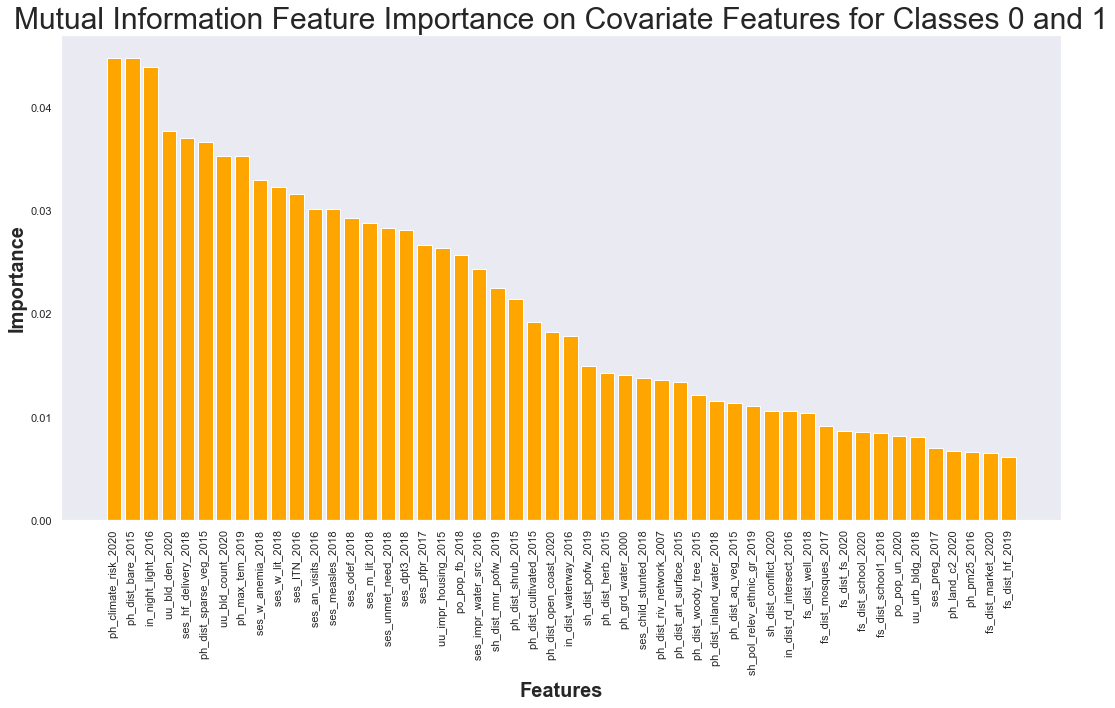

In [31]:
#Create a figure for Random Forest Feature Importance
fig = plt.figure(figsize=(15, 10), facecolor='white')

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(m_info_0_1['Covariate_features'][:50], m_info_0_1['values'][:50], color='orange')

# Set x-axis
plt.title('Mutual Information Feature Importance on Covariate Features for Classes 0 and 1', fontsize=30)
plt.xlabel('Features', fontsize = 20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance', fontsize = 20)
plt.grid(False)
# Save and show the figure
plt.tight_layout()
plt.show()

# Random Forest Model with Test Data

In [32]:
models = {'rfc': RandomForestClassifier( random_state=42)}
pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}
# Random Forest Hyper Parameters
# The grids for min_samples_split
min_samples_split_grids = [2,10, 20, 50, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1,10, 20, 50, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [33]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                                     best_param  \
0  0.951369    {'model__min_samples_leaf': 1, 'model__min_samples_split': 2}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [34]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [35]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                     Recall  \
0  [0.9963780046098123, 1.0]  [1.0, 0.8382352941176471]   

                                   F1-score  
0  [0.9981857166419265, 0.9119999999999999]

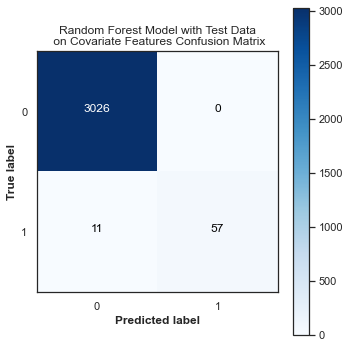

In [36]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Random Forest Model with Test Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [37]:
print('Random Forest Model with Test Data\n on Covariate Features Classification Report')
print(classification_report(y_test,y_test_pred))

Random Forest Model with Test Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3026
           1       1.00      0.84      0.91        68

    accuracy                           1.00      3094
   macro avg       1.00      0.92      0.96      3094
weighted avg       1.00      1.00      1.00      3094



# Random Forest Model with Validation Data

In [38]:
# Predict using Validation data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9977034120734908, 0.9565217391304348]   

                                     Recall  \
0  [0.9993427538613211, 0.8627450980392157]   

                                   F1-score  
0  [0.9985224101132819, 0.9072164948453608]

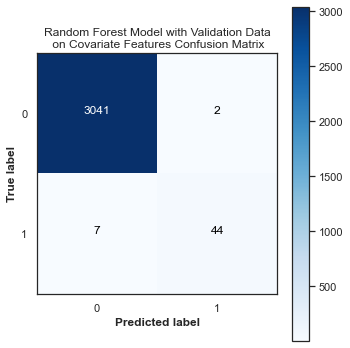

In [39]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Random Forest Model with Validation Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [40]:
print('Random Forest Model with Validation Data\n on Covariate Features Classification Report')
print(classification_report(y_val,y_val_pred))

Random Forest Model with Validation Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3043
           1       0.96      0.86      0.91        51

    accuracy                           1.00      3094
   macro avg       0.98      0.93      0.95      3094
weighted avg       1.00      1.00      1.00      3094



# Random Forest Feature Importance

In [41]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc_0_1 = df_fi_rfc_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc_0_1.head()

#save results as csv


filename = 'Covariate_best_random_forest_features_0_1.csv'
df_fi_rfc_0_1.to_csv(root / '3.Contextual_and_Covariate_Feautres_Modeling' / 'feature_selection' / 'Covariate'/ f'{filename}', index=False)



#df_fi_rfc_0_1.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_best_random_forest_features_0_1.csv',index=False)

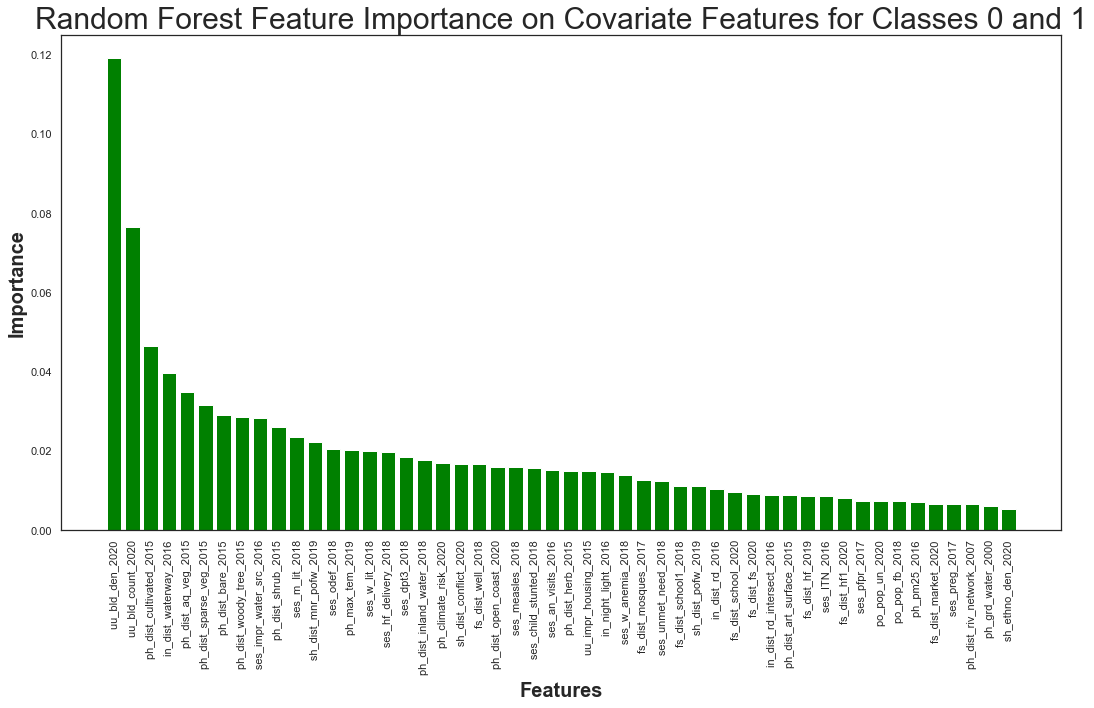

In [42]:
#Create a figure for Random Forest Feature Importance
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc_0_1['Features'][:50], df_fi_rfc_0_1['Importance'][:50], color='green')

# Set x-axis
plt.title('Random Forest Feature Importance on Covariate Features for Classes 0 and 1', fontsize=30)
plt.xlabel('Features', fontsize = 20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance', fontsize = 20)

# Save and show the figure
plt.tight_layout()
plt.show()

# Logistic Model with Testing Data

In [43]:
# Logistic model construction
models = {'lr': LogisticRegression(solver= "lbfgs", random_state=42)}


pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]


In [44]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                             best_param  \
0  0.929718    {'model__C': 10, 'model__tol': 1e-05}   

                                           best_estimator  
0  (LogisticRegression(C=10, random_state=42, tol=1e-05))

In [45]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9967029343883943, 0.9508196721311475]   

                                     Recall  \
0  [0.9990085922009253, 0.8529411764705882]   

                                   F1-score  
0  [0.9978544314243274, 0.8992248062015503]

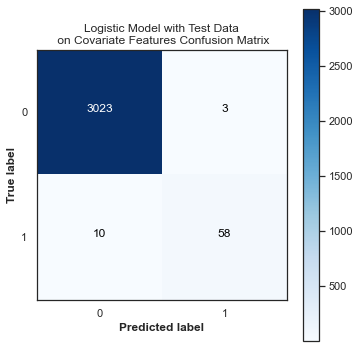

In [46]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Logistic Model with Test Data\n on Covariate Features Confusion Matrix')
plt.show()

In [47]:
print('Logistic Model with Test Data\n on Covariate Features Classification Report') 
print(classification_report(y_test,y_test_pred))

    

Logistic Model with Test Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3026
           1       0.95      0.85      0.90        68

    accuracy                           1.00      3094
   macro avg       0.97      0.93      0.95      3094
weighted avg       1.00      1.00      1.00      3094



# Logistic Model with Validation Data

In [48]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9973736047275115, 0.8958333333333334]   

                                     Recall  \
0  [0.9983568846533026, 0.8431372549019608]   

                                   F1-score  
0  [0.9978650024634587, 0.8686868686868686]

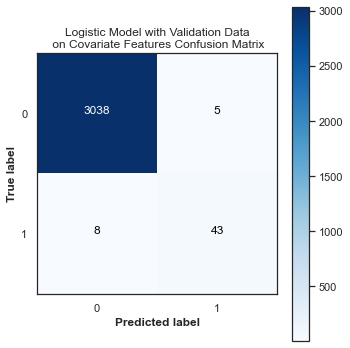

In [49]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Logistic Model with Validation Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [50]:
print('Logistic Model with Test Data\n on Covariate Features Classification Report')  
print(classification_report(y_val,y_val_pred))


Logistic Model with Test Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3043
           1       0.90      0.84      0.87        51

    accuracy                           1.00      3094
   macro avg       0.95      0.92      0.93      3094
weighted avg       1.00      1.00      1.00      3094



# Logistic Feature Importance

In [51]:
# Evaluate odds of each variable and sort by odds value
odds = np.exp(best_estimator_gs["model"].coef_[0])
best_log =pd.DataFrame(odds, X_train_scaled.columns, columns=['odds']).sort_values(by='odds', ascending=False)
best_log.reset_index(inplace=True)
best_log.rename(columns={'index':'Covariate_features','odds':'values'},inplace=True)
best_log.head(10)

Covariate_features       values
0   ses_odef_2018              1050.671279
1   ses_impr_water_src_2016    484.132542 
2   in_dist_rd_intersect_2016  244.741557 
3   ses_w_anemia_2018          37.738917  
4   fs_dist_school_2020        15.244518  
5   ses_an_visits_2016         9.847593   
6   ses_measles_2018           6.737049   
7   ph_dist_art_surface_2015   6.464724   
8   fs_dist_market_2020        6.276335   
9   ph_dist_herb_2015          5.400897

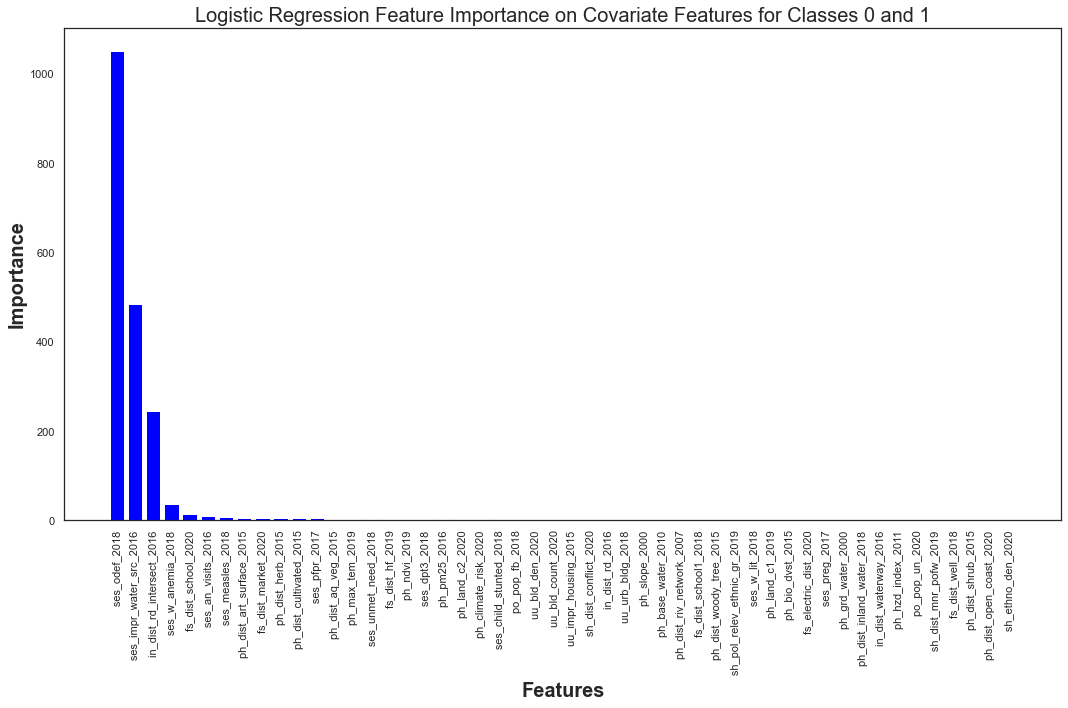

In [52]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(best_log['Covariate_features'][:50], best_log['values'][:50], color='blue')

# Set x-axis
plt.title('Logistic Regression Feature Importance on Covariate Features for Classes 0 and 1', fontsize=20)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance', fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

In [53]:
#save best logistic features in csv file

filename = 'Covariate_best_logistic_features_0_1.csv'
best_log.to_csv(root / '3.Contextual_and_Covariate_Feautres_Modeling' / 'feature_selection' / 'Covariate'/ f'{filename}', index=False)


#best_log.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_best_logistic_features_0_1.csv',index=False)



# Gradient Boosting with Testing Data

In [54]:
# hyper parameters for testing
parameter_space = {
    'loss': ['deviance'],
    'criterion': ['friedman_mse', 'mse'],
    'n_estimators': [100],
    'subsample': [1.0, 0.6],
    "learning_rate": [0.01, 0.05],
    "min_samples_split": np.linspace(0.1, 0.5, 3),
    "min_samples_leaf": np.linspace(0.1, 0.5, 3),
    "max_depth": [3, 8],
    "max_features": ["log2", "sqrt"],
}

clf = GradientBoostingClassifier(random_state=42)

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# Run Gridsearch
gs = GridSearchCV(clf, parameter_space,
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)


# run model
gs = gs.fit(X_train_scaled, y_train)

# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]


# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score  \
0  0.869261     

                                                                                                                                                                                                   best_param  \
0  {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100, 'subsample': 1.0}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [55]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [56]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                     Recall  \
0  [0.9911562397641664, 1.0]  [1.0, 0.6029411764705882]   

                                 F1-score  
0  [0.99555848001316, 0.7522935779816513]

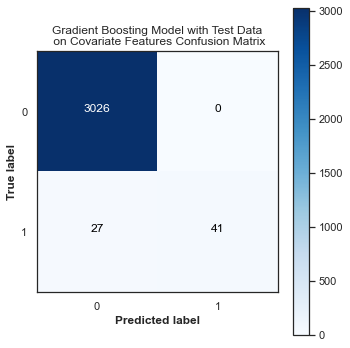

In [57]:
# Gradient Boosting Results
# create confusion matrix for Gradient Boosting test data
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Gradient Boosting Model with Test Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [58]:
print('Gradient Boosting Model with Testing Data\n on Covariate Features Classification Report') 
print(classification_report(y_test,y_test_pred))

Gradient Boosting Model with Testing Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3026
           1       1.00      0.60      0.75        68

    accuracy                           0.99      3094
   macro avg       1.00      0.80      0.87      3094
weighted avg       0.99      0.99      0.99      3094



# Gradient Boosting with Validation Data

In [59]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                     Recall  \
0  [0.9947695325269696, 1.0]  [1.0, 0.6862745098039216]   

                                  F1-score  
0  [0.9973779088823337, 0.813953488372093]

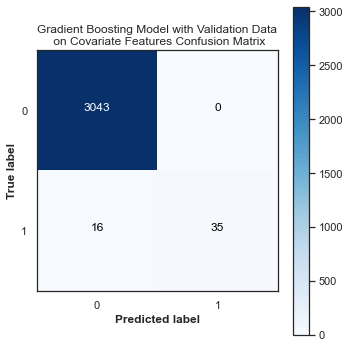

In [60]:
# Gradient Boosting Results
# create confusion matrix for Gradient Boosting test data
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val, y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Gradient Boosting Model with Validation Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [61]:
print('Gradient Boosting Model with Validation Data\n on Covariate Features Classification Report') 
print(classification_report(y_val,y_val_pred))

Gradient Boosting Model with Validation Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3043
           1       1.00      0.69      0.81        51

    accuracy                           0.99      3094
   macro avg       1.00      0.84      0.91      3094
weighted avg       0.99      0.99      0.99      3094



In [62]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_gb, best_param_gb, best_estimator_gb = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_gb_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_gb.feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

In [63]:
# Sort df_fi_rfc in descending order of the importance
df_fi_gb_0_1 = df_fi_gb_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

#save results as csv

filename = 'Covariate_best_gradient_boosting_features_0_1.csv'
df_fi_gb_0_1.to_csv(root / '3.Contextual_and_Covariate_Feautres_Modeling' / 'feature_selection' / 'Covariate'/ f'{filename}', index=False)



#df_fi_gb_0_1.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_best_gradient_boosting_features_0_1.csv',index=False)

# Gradient Boosting Feature Importance

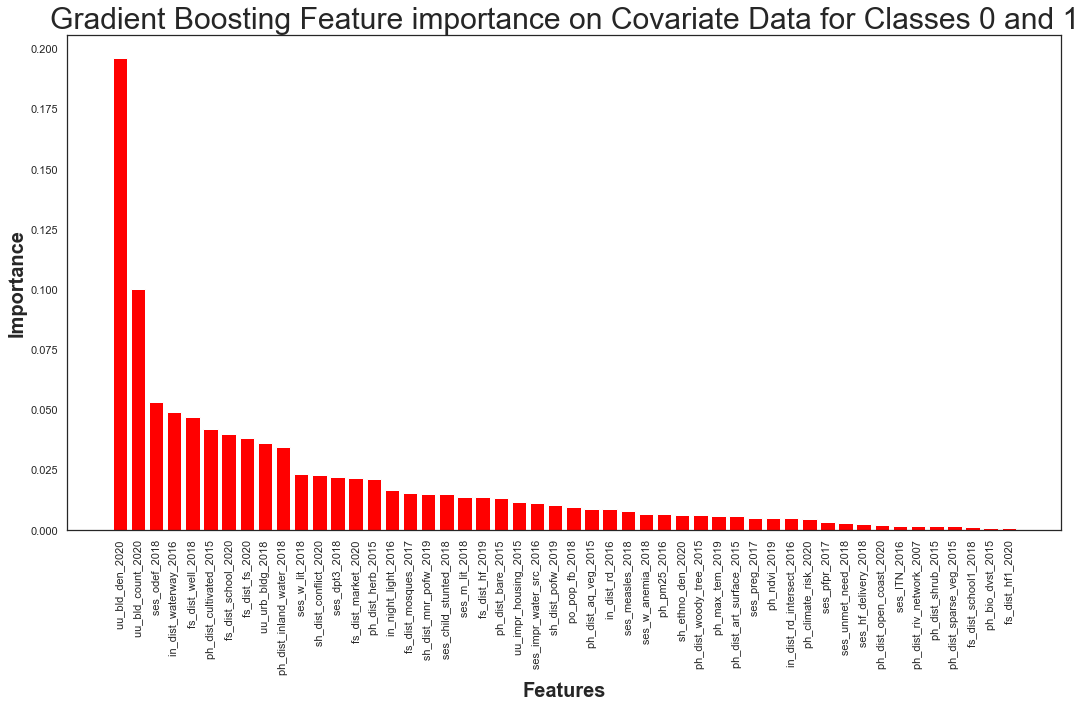

In [64]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_gb_0_1['Features'][:50], df_fi_gb_0_1['Importance'][:50], color='red')

# Set x-axis
plt.title('Gradient Boosting Feature importance on Covariate Data for Classes 0 and 1', fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance',fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

# AdaBoosting on Testing Data

In [65]:
# hyper parameters for testing
parameter_space = {
    'n_estimators': [50, 100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.025]
}

clf = AdaBoostClassifier(random_state=42)

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# Run Gridsearch
gs = GridSearchCV(clf, parameter_space,
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)


# run model
gs = gs.fit(X_train_scaled, y_train)

# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]


# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                    best_param  \
0  0.863761    {'learning_rate': 0.05, 'n_estimators': 200}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [66]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [67]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9901800327332242, 0.9743589743589743]   

                                     Recall  \
0  [0.9996695307336417, 0.5588235294117647]   

                                   F1-score  
0  [0.9949021542509454, 0.7102803738317757]

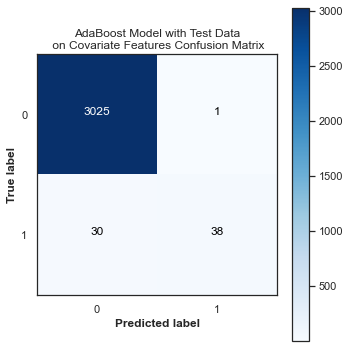

In [68]:
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('AdaBoost Model with Test Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [69]:
print('AdaBoost Model with Testing Data\n on Covariate Features Classification Report') 
print(classification_report(y_test,y_test_pred))

AdaBoost Model with Testing Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3026
           1       0.97      0.56      0.71        68

    accuracy                           0.99      3094
   macro avg       0.98      0.78      0.85      3094
weighted avg       0.99      0.99      0.99      3094



# AdaBoosting on Validation Data

In [70]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                     Recall  \
0  [0.9941195687683764, 1.0]  [1.0, 0.6470588235294118]   

                                   F1-score  
0  [0.9970511140235911, 0.7857142857142858]

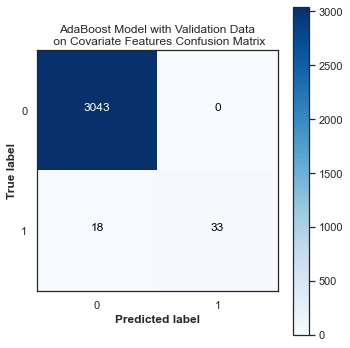

In [71]:
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val, y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('AdaBoost Model with Validation Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [72]:
print('AdaBoost Model with Validation Data\n on Covariate Features Classification Report') 
print(classification_report(y_val,y_val_pred))

AdaBoost Model with Validation Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3043
           1       1.00      0.65      0.79        51

    accuracy                           0.99      3094
   macro avg       1.00      0.82      0.89      3094
weighted avg       0.99      0.99      0.99      3094



# AdaBoosting Feature Importance

In [73]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_ad, best_param_ad, best_estimator_ad = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_ad_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_ad.feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

In [74]:
# Sort df_fi_rfc in descending order of the importance
df_fi_ad_0_1 = df_fi_ad_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_ad_0_1.head()

#save results as csv

filename = 'Covariate_best_ada_boosting_features_0_1.csv'
df_fi_ad_0_1.to_csv(root / '3.Contextual_and_Covariate_Feautres_Modeling' / 'feature_selection' / 'Covariate'/ f'{filename}', index=False)



#df_fi_ad_0_1.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_best_ada_boosting_features_0_1.csv',index=False)

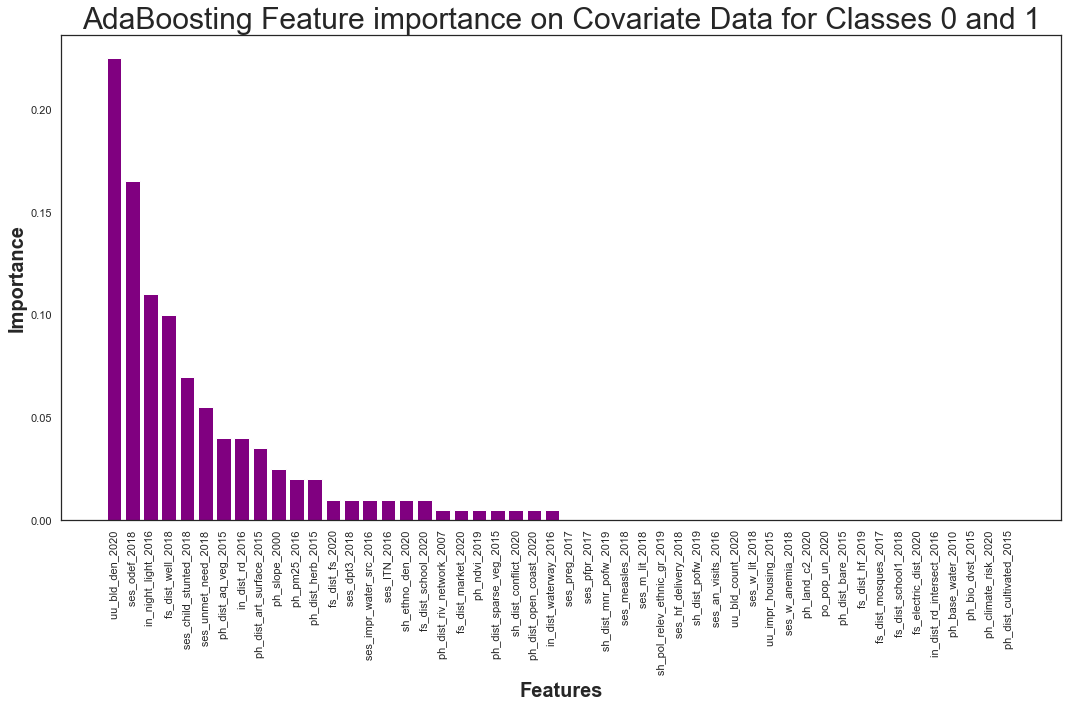

In [75]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_ad_0_1['Features'][:50], df_fi_ad_0_1['Importance'][:50], color='purple')

# Set x-axis
plt.title('AdaBoosting Feature importance on Covariate Data for Classes 0 and 1', fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance',fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

In [76]:
df_fi_ad_0_1.head()


Features Importance
0   uu_bld_den_2020         0.225    
1   ses_odef_2018           0.165    
2   in_night_light_2016     0.11     
3   fs_dist_well_2018       0.1      
4   ses_child_stunted_2018  0.07

# Comparing Feature Selections of Different Models

In [77]:
# Random Forest feature importance two classes
df_fi_rfc_0_1 = df_fi_rfc_0_1.rename(columns = {'Features':'Covariate_features','Importance':'values'})
df_fi_rfc_0_1['top_Random_Forest_0_1']= range(1,len(df_fi_rfc_0_1)+1)
#df_fi_rfc_0_1.drop(['values'],axis=1, inplace=True)
df_fi_rfc_0_1.head()

Covariate_features    values  top_Random_Forest_0_1
0   uu_bld_den_2020          0.119095  1                    
1   uu_bld_count_2020        0.076437  2                    
2   ph_dist_cultivated_2015  0.046593  3                    
3   in_dist_waterway_2016    0.039785  4                    
4   ph_dist_aq_veg_2015      0.034857  5

In [78]:
# logisitc featue importance for two classes
best_log['top_logistic_0_1'] = range(1,len(best_log)+1)
#best_log.drop(['values'],axis=1, inplace=True)
best_log.head()

Covariate_features       values  top_logistic_0_1
0   ses_odef_2018              1050.671279  1               
1   ses_impr_water_src_2016    484.132542   2               
2   in_dist_rd_intersect_2016  244.741557   3               
3   ses_w_anemia_2018          37.738917    4               
4   fs_dist_school_2020        15.244518    5

In [79]:
# Gradient Boosting feature importance for two classes
df_fi_gb_0_1 = df_fi_gb_0_1.rename(columns = {'Features':'Covariate_features','Importance':'values'})
df_fi_gb_0_1['top_Gradient_Boosting_0_1']= range(1,len(df_fi_gb_0_1)+1)
#df_fi_gb_0_1.drop(['values'],axis=1, inplace=True)
df_fi_gb_0_1.head()

Covariate_features    values  top_Gradient_Boosting_0_1
0   uu_bld_den_2020        0.196033  1                        
1   uu_bld_count_2020      0.100384  2                        
2   ses_odef_2018          0.053329  3                        
3   in_dist_waterway_2016  0.049252  4                        
4   fs_dist_well_2018      0.046982  5

In [80]:
df_fi_ad_0_1 = df_fi_ad_0_1.rename(columns = {'Features':'Covariate_features','Importance':'values'})
df_fi_ad_0_1['top_Ada_Boosting_0_1']= range(1,len(df_fi_ad_0_1)+1)
#df_fi_gb_0_1.drop(['values'],axis=1, inplace=True)
df_fi_ad_0_1.head()

Covariate_features values  top_Ada_Boosting_0_1
0   uu_bld_den_2020         0.225  1                   
1   ses_odef_2018           0.165  2                   
2   in_night_light_2016     0.11   3                   
3   fs_dist_well_2018       0.1    4                   
4   ses_child_stunted_2018  0.07   5

In [81]:
m_info_0_1['minfo_0_1'] = range(1,len(m_info_0_1)+1)
m_info_0_1.head()

Covariate_features    values  minfo_0_1
0   ph_climate_risk_2020  0.044812  1        
1   ph_dist_bare_2015     0.044808  2        
2   in_night_light_2016   0.043917  3        
3   uu_bld_den_2020       0.037769  4        
4   ses_hf_delivery_2018  0.037027  5

In [82]:
#merge best features for all three methods 
best_0 = best_log.merge(df_fi_rfc_0_1[['Covariate_features','top_Random_Forest_0_1']],how='inner', on = 'Covariate_features')
best_1 = best_0.merge(df_fi_gb_0_1[['Covariate_features','top_Gradient_Boosting_0_1']],how='inner',on = 'Covariate_features')
best_2 = best_1.merge(df_fi_ad_0_1[['Covariate_features','top_Ada_Boosting_0_1']],how='inner',on = 'Covariate_features')
best = best_2.merge(m_info_0_1[['Covariate_features','minfo_0_1']],how='inner',on = 'Covariate_features')
#create rank column
best['combined_rank'] = best['top_logistic_0_1'] + best['top_Random_Forest_0_1'] + best['top_Gradient_Boosting_0_1'] + best['top_Ada_Boosting_0_1'] + best['minfo_0_1']

best = best.sort_values(by= ['combined_rank'], ascending =True).reset_index(drop=True)
best['rank']= range(1,len(best)+1)
del best['values']
best.head(60)

Covariate_features  top_logistic_0_1  top_Random_Forest_0_1  \
0    uu_bld_den_2020              24                1                       
1    ses_odef_2018                1                 13                      
2    uu_bld_count_2020            25                2                       
3    ses_impr_water_src_2016      2                 9                       
4    ses_dpt3_2018                18                17                      
5    ph_dist_aq_veg_2015          13                5                       
6    ph_dist_herb_2015            10                26                      
7    ph_dist_cultivated_2015      11                3                       
8    ses_child_stunted_2018       22                24                      
9    ses_measles_2018             7                 23                      
10   in_dist_waterway_2016        43                4                       
11   in_night_light_2016          56                28                      
12   fs_dist_school_2020          5                 35                      
13   ses_w_lit_2018               36                15                      
14   ses_unmet_need_2018          15                31                      
15   ses_w_anemia_2018            4                 29                      
16   fs_dist_well_2018            47                21                      
17   sh_dist_conflict_2020        27                20                      
18   ph_dist_art_surface_2015     8                 38                      
19   ph_dist_bare_2015            52                7                       
20   sh_dist_mnr_pofw_2019        46                12                      
21   ses_an_visits_2016           6                 25                      
22   ses_m_lit_2018               53                11                      
23   ph_climate_risk_2020         21                19                      
24   ph_max_tem_2019              14                14                      
25   uu_impr_housing_2015         26                27                      
26   ph_dist_sparse_veg_2015      55                6                       
27   fs_dist_market_2020          9                 46                      
28   ses_pfpr_2017                12                42                      
29   in_dist_rd_2016              28                34                      
30   ses_hf_delivery_2018         54                16                      
31   ph_pm25_2016                 19                45                      
32   ph_dist_inland_water_2018    42                18                      
33   fs_dist_fs_2020              58                36                      
34   ph_dist_woody_tree_2015      34                8                       
35   in_dist_rd_intersect_2016    3                 37                      
36   ph_dist_open_coast_2020      49                22                      
37   po_pop_fb_2018               23                44                      
38   fs_dist_hf_2019              16                39                      
39   ses_ITN_2016                 59                40                      
40   ph_dist_riv_network_2007     32                48                      
41   sh_dist_pofw_2019            60                33                      
42   ph_dist_shrub_2015           48                10                      
43   fs_dist_mosques_2017         51                30                      
44   ph_ndvi_2019                 17                52                      
45   ses_preg_2017                40                47                      
46   fs_dist_school1_2018         33                32                      
47   uu_urb_bldg_2018             29                57                      
48   sh_ethno_den_2020            50                50                      
49   sh_pol_relev_ethnic_gr_2019  35                51                      
50   ph_slope_2000                30                56                      
51   po_po

In [83]:
# save file 

filename = 'Covariate_Features_Ranking.csv'
best.to_csv(root / '3.Contextual_and_Covariate_Feautres_Modeling' / 'feature_selection' / 'Covariate'/ f'{filename}', index=False)


#best.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_Features_Ranking.csv',index=False)



# Statistical tests for confirm difference between Deprived and Built-up

# Chi Square test of Independence for Cateogircal features

In [84]:
# introduced Chi Square test on six categorical variables to see if they were statistically significant 
# in showing a difference between 'Deprived' and 'Built-up' areas

In [85]:
# identified categorical features
best_cat = best.set_index('Covariate_features')
best_cat = best_cat.loc[[ ' fs_electric_dist_2020', ' ph_hzd_index_2011', ' ph_land_c1_2019',
                        ' ph_land_c2_2020', ' sh_pol_relev_ethnic_gr_2019', ' uu_urb_bldg_2018']]
best_cat

top_logistic_0_1  top_Random_Forest_0_1  \
Covariate_features                                                      
 fs_electric_dist_2020        39                54                      
 ph_hzd_index_2011            44                55                      
 ph_land_c1_2019              37                60                      
 ph_land_c2_2020              20                59                      
 sh_pol_relev_ethnic_gr_2019  35                51                      
 uu_urb_bldg_2018             29                57                      

                              top_Gradient_Boosting_0_1  top_Ada_Boosting_0_1  \
Covariate_features                                                              
 fs_electric_dist_2020        54                         45                     
 ph_hzd_index_2011            55                         56                     
 ph_land_c1_2019              58                         57                     
 ph_land_c2_2020              60                         39                     
 sh_pol_relev_ethnic_gr_2019  57                         31                     
 uu_urb_bldg_2018             9                          60                     

                              minfo_0_1  combined_rank  rank  
Covariate_features                                            
 fs_electric_dist_2020        55         247            57    
 ph_hzd_index_2011            56         266            59    
 ph_land_c1_2019              57         269            60    
 ph_land_c2_2020              47         225            53    
 sh_pol_relev_ethnic_gr_2019  36         210            50    
 uu_urb_bldg_2018             45         200            48

In [86]:
#created dataframe for categorical features with Label data

df_cat = df[['Label',' fs_electric_dist_2020',' ph_hzd_index_2011',' ph_land_c1_2019',
                  ' ph_land_c2_2020', ' sh_pol_relev_ethnic_gr_2019',' uu_urb_bldg_2018']]


In [87]:
# convert values to categorical
df_cat['Label'] = pd.Categorical(df_cat['Label'])
df_cat[' fs_electric_dist_2020'] = pd.Categorical(df_cat[' fs_electric_dist_2020'])
df_cat[' ph_hzd_index_2011'] = pd.Categorical(df_cat[' ph_hzd_index_2011'])
df_cat[' ph_land_c1_2019'] = pd.Categorical(df_cat[' ph_land_c1_2019'])
df_cat[' ph_land_c2_2020'] = pd.Categorical(df_cat[' ph_land_c2_2020'])
df_cat[' sh_pol_relev_ethnic_gr_2019'] = pd.Categorical(df_cat[' sh_pol_relev_ethnic_gr_2019'])
df_cat[' uu_urb_bldg_2018'] = pd.Categorical(df_cat[' uu_urb_bldg_2018'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15470 entries, 0 to 47494
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Label                         15470 non-null  category
 1    fs_electric_dist_2020        15470 non-null  category
 2    ph_hzd_index_2011            15470 non-null  category
 3    ph_land_c1_2019              15470 non-null  category
 4    ph_land_c2_2020              15470 non-null  category
 5    sh_pol_relev_ethnic_gr_2019  15470 non-null  category
 6    uu_urb_bldg_2018             15470 non-null  category
dtypes: category(7)
memory usage: 228.1 KB


In [88]:
df_cat.head()

Label  fs_electric_dist_2020  ph_hzd_index_2011  ph_land_c1_2019  \
0  0     0.0                    3.0                126.0             
1  0     0.0                    3.0                126.0             
2  0     0.0                    3.0                50.0              
3  0     0.0                    3.0                50.0              
4  0     0.0                    3.0                50.0              

   ph_land_c2_2020  sh_pol_relev_ethnic_gr_2019  uu_urb_bldg_2018  
0  20.0             1.0                         -1.0               
1  80.0             1.0                         -1.0               
2  80.0             1.0                         -1.0               
3  80.0             1.0                          0.0               
4  20.0             1.0                         -1.0

In [89]:
# run chi square test on categorical variables
crosstab_1 = pd.crosstab(df_cat["Label"], df_cat[" fs_electric_dist_2020"], margins=True)
c,p,dof, ex = stats.chi2_contingency(crosstab_1)

print('chi2 statistic for fs_electric_dist_2020 was' , round(c,4))
print('p-value for fs_electric_dist_2020 was' , round(p,4))
print('The contingency table was\n ')

#convert expected value to dataframe
expected_1 = pd.DataFrame(ex)
expected_1 = expected_1.iloc[:-1 , :-1]
expected_1.rename(columns={0:'0_expected',1:'1_expected'},inplace=True)

# clean up observed dataframe
crosstab_1 = crosstab_1.iloc[:-1 , :-1]
crosstab_1.rename(columns={0:'0_observed',1:'1_observed'},inplace=True)  
crosstab_1

#concatonate observed and expected tables
table_1 = pd.concat([crosstab_1,expected_1], axis=1)
table_1 = table_1.reindex(sorted(table_1.columns), axis=1)
table_1

chi2 statistic for fs_electric_dist_2020 was 1.9871
p-value for fs_electric_dist_2020 was 0.7381
The contingency table was
 


0_expected  0_observed    1_expected  1_observed
0  3958.941758  3969        11242.058242  11232     
1  70.058242    60          198.941758    209

In [90]:
table_1 = pd.concat([crosstab_1,expected_1], axis=1)
table_1 = table_1.reindex(sorted(table_1.columns), axis=1)
table_1


0_expected  0_observed    1_expected  1_observed
0  3958.941758  3969        11242.058242  11232     
1  70.058242    60          198.941758    209

<Figure size 1440x1080 with 0 Axes>

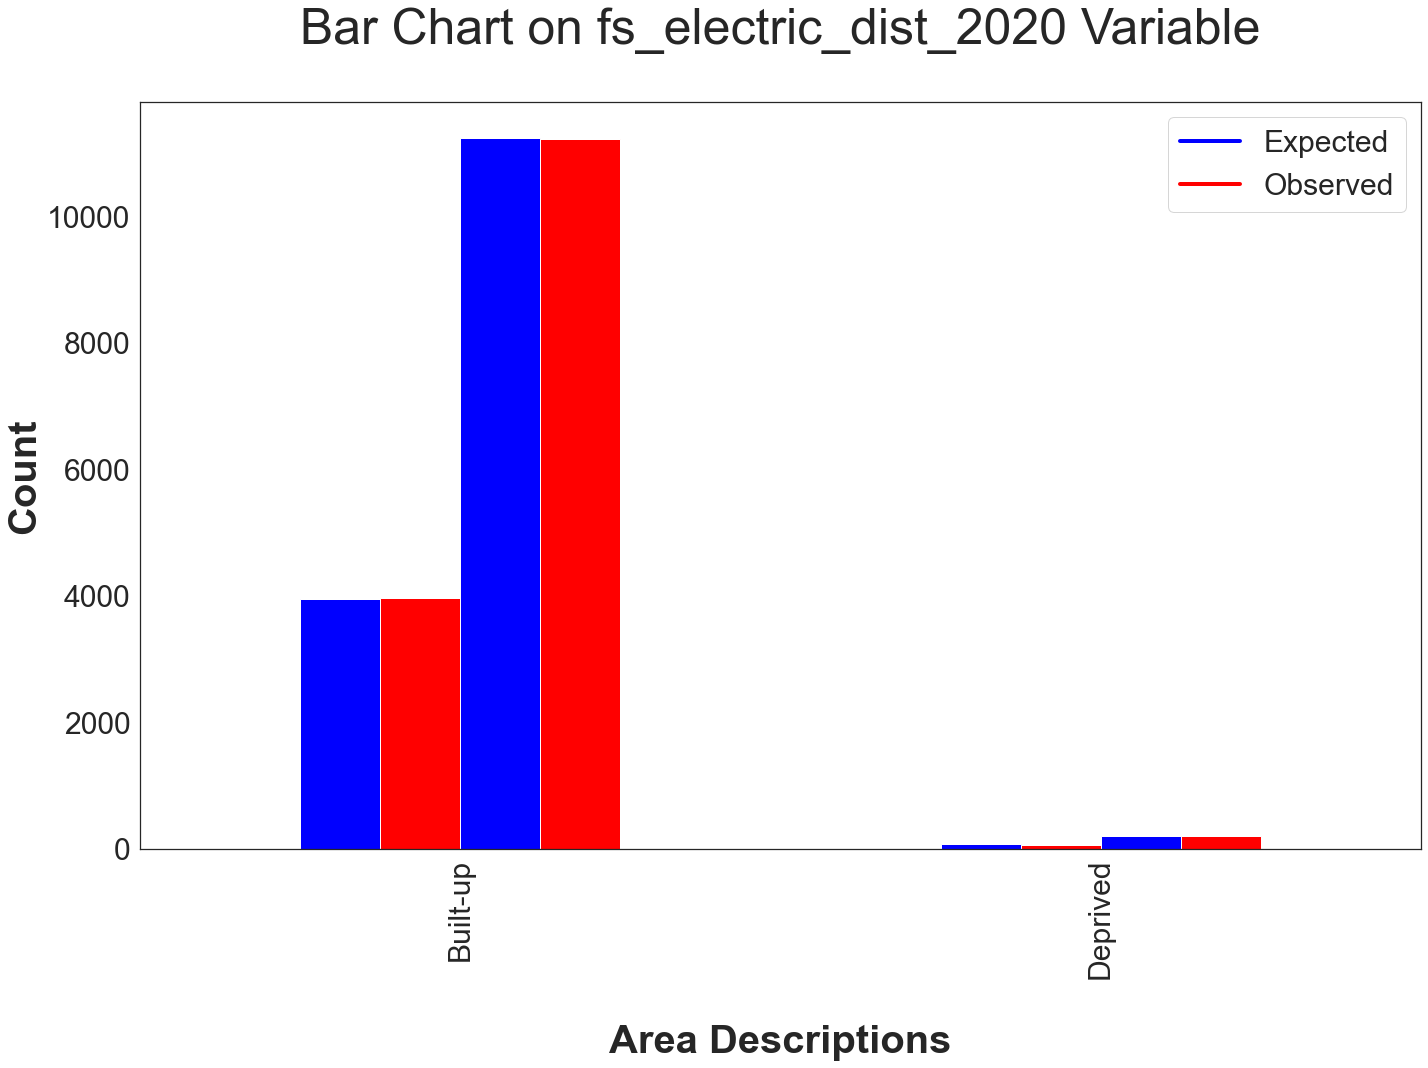

In [91]:
# plot data for first 
plt.figure()
table_1.plot.bar(color = ['blue','red','blue','red','blue','red','blue','red'],xticks=[] ,rot= 90)
plt.title('Bar Chart on fs_electric_dist_2020 Variable\n ',fontsize= 50)
plt.ylabel('Count',fontsize= 40)
plt.xticks([0, 1], ['Built-up', 'Deprived'], fontsize= 30,rotation=450)
plt.yticks(fontsize=30)
plt.xlabel('\nArea Descriptions', fontsize=40)
plt.grid(False)
colors = ['blue','red']
lines = [Line2D([0], [0], color=c, linewidth=4) for c in colors]
labels = ['Expected','Observed']
plt.legend(lines,labels,prop={'size': 30})
plt.tight_layout()
plt.show()


In [92]:
# run chi square test on categorical variables
crosstab_2 = pd.crosstab(df_cat["Label"], df_cat[" ph_hzd_index_2011"], margins= True)
c,p,dof,ex = stats.chi2_contingency(crosstab_2)
print('chi2 statistic for ph_hzd_index_2011 was' , round(c,4))
print('The contingency table is\n ', ex)
print('p-value for ph_hzd_index_2011 was' , round(p,4))

#convert expected value to dataframe
expected_2 = pd.DataFrame(ex)
expected_2 = expected_2.iloc[:-1 , :-1]
expected_2.rename(columns={0:'0_expected',1:'1_expected', 2: '2_expected',
                          3: '3_expected', 4:'4_expected',5:'5_expected'},inplace=True)
expected_2

chi2 statistic for ph_hzd_index_2011 was 49.4278
The contingency table is
  [[2.18e+03 1.11e+02 4.66e+03 7.99e+02 6.81e+03 6.46e+02 1.52e+04]
 [3.86e+01 1.96e+00 8.24e+01 1.41e+01 1.21e+02 1.14e+01 2.69e+02]
 [2.22e+03 1.13e+02 4.74e+03 8.13e+02 6.93e+03 6.57e+02 1.55e+04]]
p-value for ph_hzd_index_2011 was 0.0


0_expected  1_expected   2_expected  3_expected   4_expected  5_expected
0  2178.449709  111.0351    4655.613316  798.863154  6811.462961  645.57576 
1  38.550291    1.9649      82.386684    14.136846   120.537039   11.42424

In [93]:
# clean up observed dataframe
crosstab_2 = crosstab_2.iloc[:-1 , :-1]
crosstab_2.rename(columns={0:'0_observed',1:'1_observed', 2: '2_observed',
                          3: '3_observed', 4:'4_observed',5:'5_observed'},inplace=True) 
crosstab_2

#concatonate observed and expected tables
table_2 = pd.concat([crosstab_2,expected_2], axis=1)
table_2 = table_2.reindex(sorted(table_2.columns), axis=1)
table_2

0_expected  0_observed  1_expected  1_observed   2_expected  2_observed  \
0  2178.449709  2169        111.0351    113         4655.613316  4687         
1  38.550291    48          1.9649      0           82.386684    51           

   3_expected  3_observed   4_expected  4_observed  5_expected  5_observed  
0  798.863154  781         6811.462961  6796        645.57576   655         
1  14.136846   32          120.537039   136         11.42424    2

<Figure size 1440x1080 with 0 Axes>

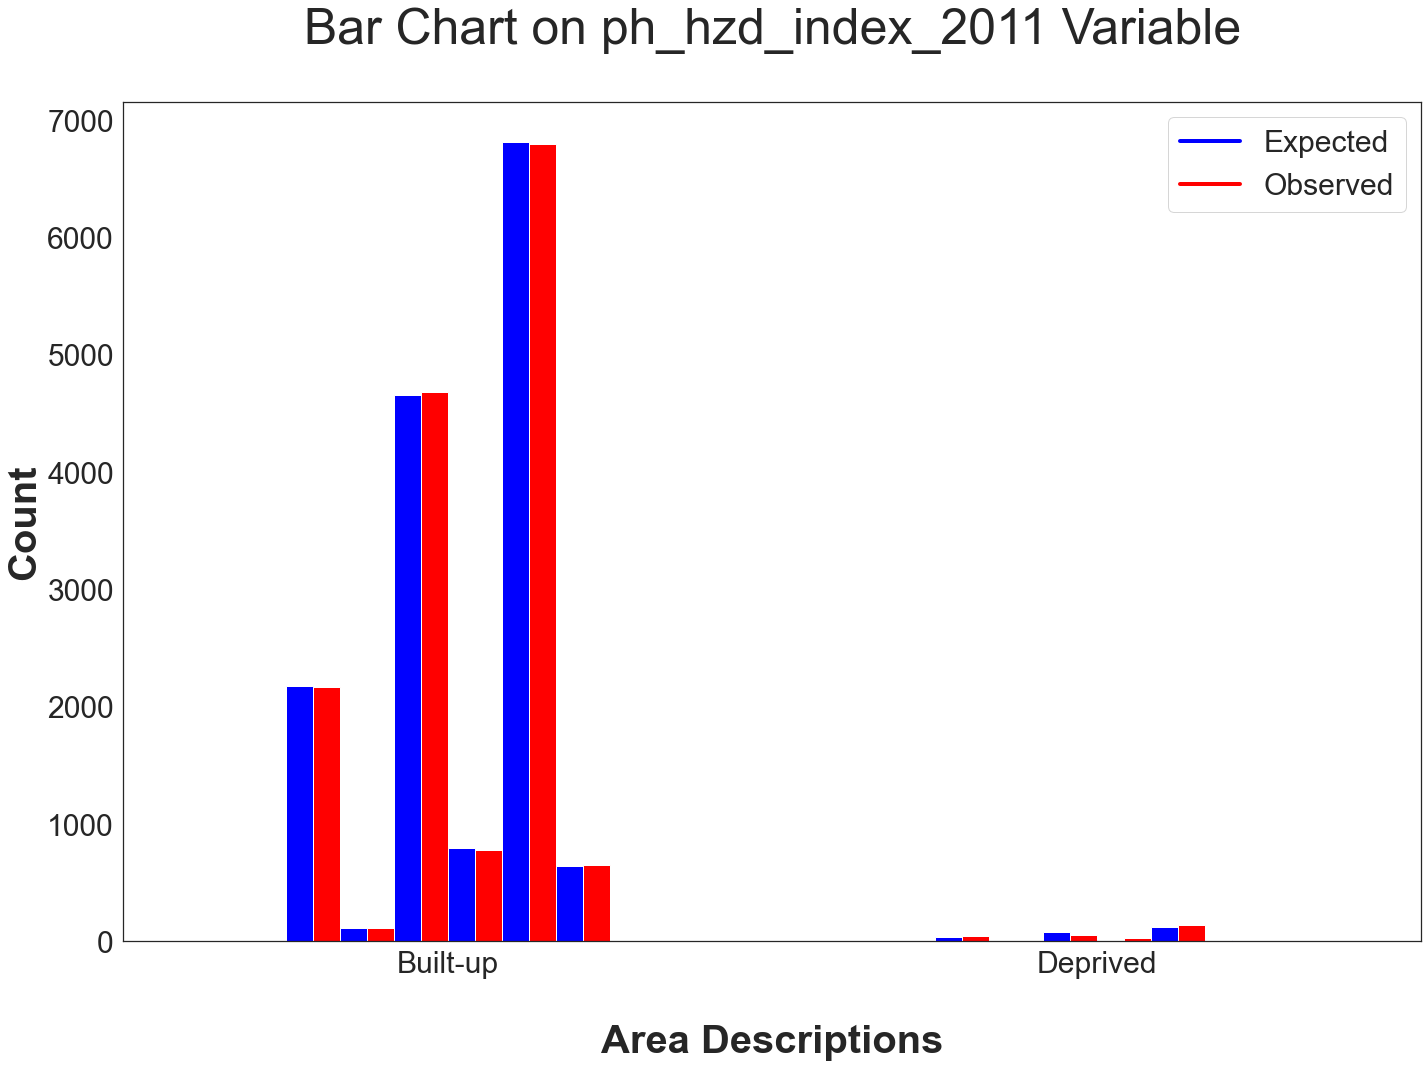

In [94]:
# plot data for first 
plt.figure()
table_2.plot.bar(color = ['blue','red','blue','red','blue','red','blue','red',
                         'blue','red','blue','red'],xticks=[] ,rot= 90)
plt.title('Bar Chart on ph_hzd_index_2011 Variable\n ',fontsize= 50)
plt.ylabel('Count',fontsize= 40)
plt.xticks(rotation=90)
plt.xticks([0, 1], ['Built-up', 'Deprived'], fontsize= 30)
plt.yticks(fontsize=30)
plt.xlabel('\nArea Descriptions', fontsize=40)
plt.grid(False)
colors = ['blue','red']
lines = [Line2D([0], [0], color=c, linewidth=4) for c in colors]
labels = ['Expected','Observed']
plt.legend(lines,labels,prop={'size': 30})
plt.tight_layout()
plt.show()

In [95]:
crosstab_3 = pd.crosstab(df_cat["Label"], df_cat[" ph_land_c1_2019"], margins= True)
c,p,dof,ex = stats.chi2_contingency(crosstab_3)
print('chi2 statistic for ph_land_c1_2019 was' , round(c,4))
print('The contingency table is\n ', ex)
print('p-value for ph_land_c1_2019 was' , round(p,4))
crosstab_3

chi2 statistic for ph_land_c1_2019 was 74.8944
The contingency table is
  [[7.17e+02 1.95e+03 1.31e+03 1.01e+04 2.46e+01 2.75e+01 2.02e+02 6.88e+00
  8.35e+01 7.38e+02 8.25e+01 1.52e+04]
 [1.27e+01 3.44e+01 2.32e+01 1.78e+02 4.35e-01 4.87e-01 3.58e+00 1.22e-01
  1.48e+00 1.31e+01 1.46e+00 2.69e+02]
 [7.30e+02 1.98e+03 1.33e+03 1.02e+04 2.50e+01 2.80e+01 2.06e+02 7.00e+00
  8.50e+01 7.51e+02 8.40e+01 1.55e+04]]
p-value for ph_land_c1_2019 was 0.0


ph_land_c1_2019  20.0  30.0  40.0   50.0  60.0  80.0  90.0  112.0  116.0  \
Label                                                                       
0                 725   1972  1332  10000  25    27    204   7      85      
1                 5     9     0     241    0     1     2     0      0       
All               730   1981  1332  10241  25    28    206   7      85      

 ph_land_c1_2019  126.0  200.0    All  
Label                                  
0                 742    82     15201  
1                 9      2      269    
All               751    84     15470

In [96]:
crosstab_3 = crosstab_3.iloc[:-1 , :-1]
crosstab_3.rename(columns= {20:'20_observed',30:'30_observed',40:'40_observed',
                           50:'50_observed',60:'60_observed',80:'80_observed',
                           90:'90_observed',112:'112_observed',116:'116_observed',
                           126:'126_observed',200:'200_observed'},inplace=True)
crosstab_3

ph_land_c1_2019  20_observed  30_observed  40_observed  50_observed  \
Label                                                                  
0                 725          1972         1332         10000         
1                 5            9            0            241           

 ph_land_c1_2019  60_observed  80_observed  90_observed  112_observed  \
Label                                                                   
0                 25           27           204          7              
1                 0            1            2            0              

 ph_land_c1_2019  116_observed  126_observed  200_observed  
Label                                                       
0                 85            742           82            
1                 0             9             2

In [97]:
#convert expected value to dataframe
expected_3 = pd.DataFrame(ex)
expected_3 = expected_3.iloc[:-1 , :-1]
expected_3.rename(columns= {0:'20_expected',1:'30_expected',2:'40_expected',
                           3:'50_expected',4:'60_expected',5:'80_expected',
                           6:'90_expected',7:'112_expected',8:'116_expected',
                           9:'126_expected',10:'200_expected'},inplace=True)
expected_3

20_expected  30_expected  40_expected   50_expected  60_expected  \
0  717.306399   1946.553394  1308.838526  10062.924434  24.565288     
1  12.693601    34.446606    23.161474    178.075566    0.434712      

   80_expected  90_expected  112_expected  116_expected  126_expected  \
0  27.513122    202.41797    6.878281      83.521978     737.941241     
1  0.486878     3.58203      0.121719      1.478022      13.058759      

   200_expected  
0  82.539367     
1  1.460633

In [98]:
#concatonate observed and expected tables
table_3 = pd.concat([crosstab_3,expected_3], axis=1)
#table_3 = table_3.reindex(sorted(table_3.columns), axis=1)
table_3 = table_3[['20_expected','20_observed', '30_expected','30_observed','40_expected','40_observed',
                  '50_expected','50_observed','60_expected','60_observed','80_expected','80_observed',
                  '90_expected','90_observed','112_expected','112_observed','116_expected','116_observed',
                  '126_expected','126_observed','200_expected','200_observed']]
table_3

20_expected  20_observed  30_expected  30_observed  40_expected  \
0  717.306399   725          1946.553394  1972         1308.838526   
1  12.693601    5            34.446606    9            23.161474     

   40_observed   50_expected  50_observed  60_expected  60_observed  \
0  1332         10062.924434  10000        24.565288    25            
1  0            178.075566    241          0.434712     0             

   80_expected  80_observed  90_expected  90_observed  112_expected  \
0  27.513122    27           202.41797    204          6.878281       
1  0.486878     1            3.58203      2            0.121719       

   112_observed  116_expected  116_observed  126_expected  126_observed  \
0  7             83.521978     85            737.941241    742            
1  0             1.478022      0             13.058759     9              

   200_expected  200_observed  
0  82.539367     82            
1  1.460633      2

<Figure size 1440x1080 with 0 Axes>

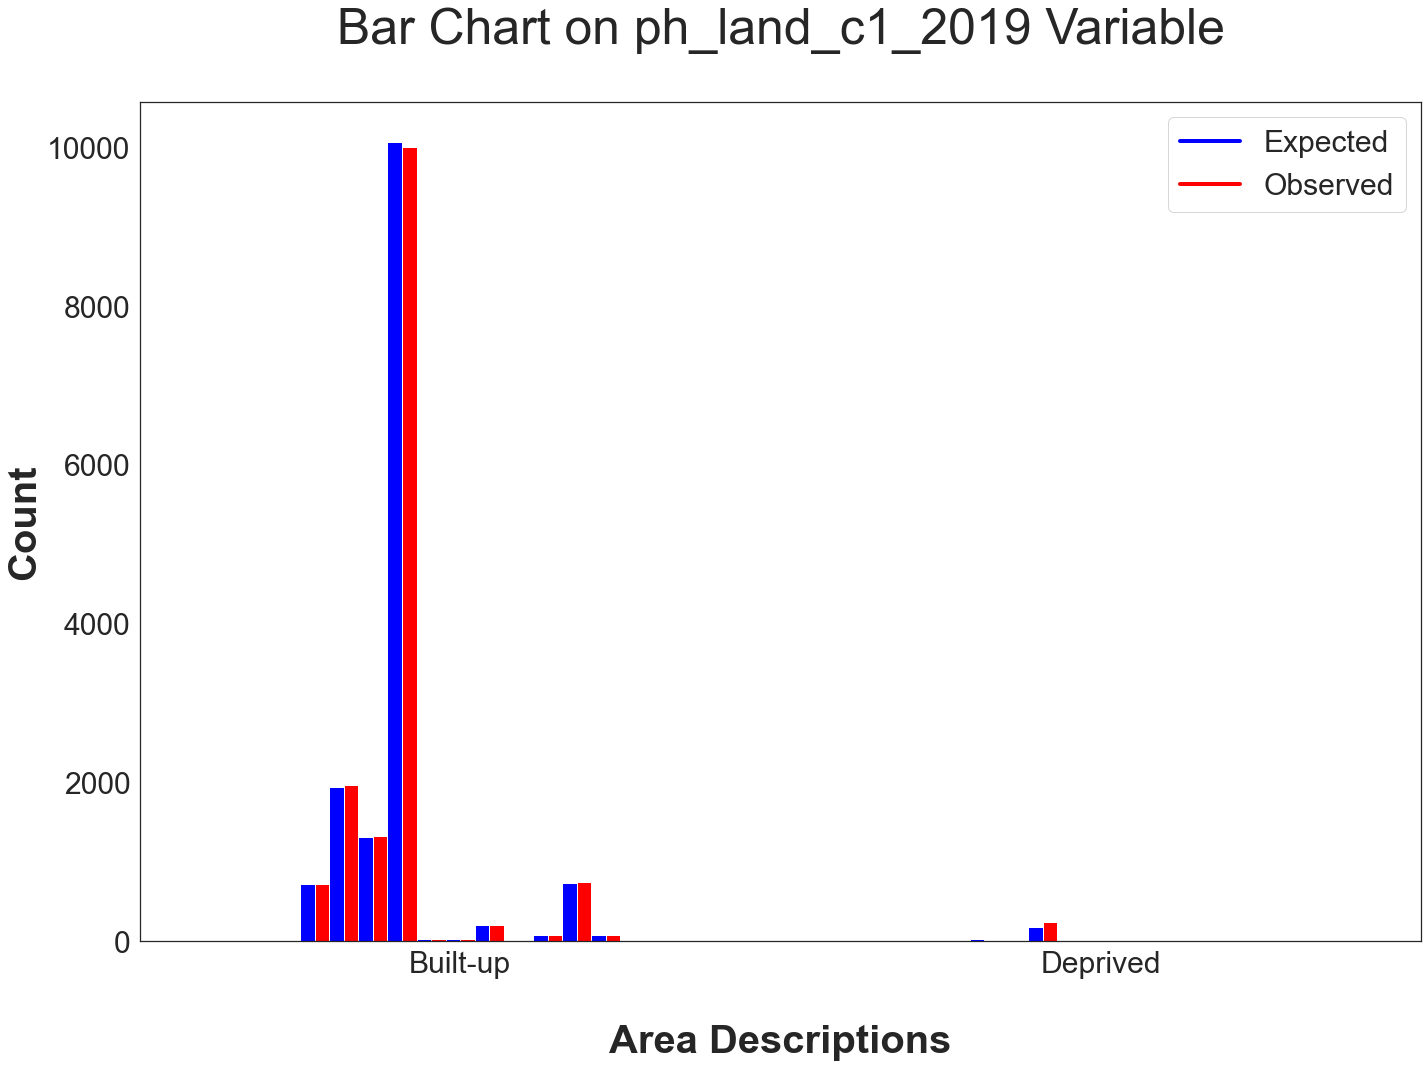

In [99]:
# plot data for first 
plt.figure()
table_3.plot.bar(color = ['blue','red','blue','red','blue','red','blue','red',
                         'blue','red','blue','red','blue','red','blue','red','blue','red','blue','red',
                         'blue','red'],xticks=[] ,rot= 90)
plt.title('Bar Chart on ph_land_c1_2019 Variable\n ',fontsize= 50)
plt.ylabel('Count',fontsize= 40)
plt.xticks([0, 1], ['Built-up', 'Deprived'], fontsize= 30)
plt.yticks(fontsize=30)
plt.xlabel('\nArea Descriptions', fontsize=40)
plt.grid(False)
colors = ['blue','red']
lines = [Line2D([0], [0], color=c, linewidth=4) for c in colors]
labels = ['Expected','Observed']
plt.legend(lines,labels,prop={'size': 30})
plt.tight_layout()
plt.show()

In [100]:
crosstab_4 = pd.crosstab(df_cat["Label"], df_cat[" ph_land_c2_2020"], margins= True)
c,p,dof,ex = stats.chi2_contingency(crosstab_4)
print('chi2 statistic for ph_land_c2_2020 was' , round(c,4))
print('The contingency table is\n ', ex)
print('p-value for ph_land_c2_2020 was' , round(p,4))
crosstab_4

chi2 statistic for ph_land_c2_2020 was 607.0161
The contingency table is
  [[2.16e+01 2.13e+03 1.44e+02 3.85e+02 5.60e+02 4.70e+02 1.15e+04 9.83e-01
  1.52e+04]
 [3.83e-01 3.77e+01 2.56e+00 6.82e+00 9.91e+00 8.31e+00 2.03e+02 1.74e-02
  2.69e+02]
 [2.20e+01 2.17e+03 1.47e+02 3.92e+02 5.70e+02 4.78e+02 1.17e+04 1.00e+00
  1.55e+04]]
p-value for ph_land_c2_2020 was 0.0


ph_land_c2_2020  10.0  20.0  30.0  40.0  50.0  60.0   80.0  255.0    All
Label                                                                    
0                 22    2140  106   388   568   477   11499  1      15201
1                 0     26    41    4     2     1     195    0      269  
All               22    2166  147   392   570   478   11694  1      15470

In [101]:
crosstab_4 = crosstab_4.iloc[:-1 , :-1]
crosstab_4.rename(columns= {10:'10_observed',20:'20_observed',30:'30_observed',
                           40:'40_observed',50:'50_observed',60:'60_observed',
                           80:'80_observed',255.0:'255_observed'},inplace=True)
crosstab_4

ph_land_c2_2020  10_observed  20_observed  30_observed  40_observed  \
Label                                                                  
0                 22           2140         106          388           
1                 0            26           41           4             

 ph_land_c2_2020  50_observed  60_observed  80_observed  255_observed  
Label                                                                  
0                 568          477          11499        1             
1                 2            1            195          0

In [102]:
#convert expected value to dataframe
expected_4 = pd.DataFrame(ex)
expected_4 = expected_4.iloc[:-1 , :-1]
expected_4.rename(columns= {0:'10_expected',1:'20_expected',2:'30_expected',
                           3:'40_expected',4:'50_expected',5:'60_expected',
                           6:'80_expected',7:'255_expected'},inplace=True)
expected_4

10_expected  20_expected  30_expected  40_expected  50_expected  \
0  21.617453    2128.336522  144.443891   385.18371    560.088559    
1  0.382547     37.663478    2.556109     6.81629      9.911441      

   60_expected   80_expected  255_expected  
0  469.6883     11490.658953  0.982612      
1  8.3117       203.341047    0.017388

In [103]:
#concatonate observed and expected tables
table_4 = pd.concat([crosstab_4,expected_4], axis=1)

table_4 = table_4[['10_expected','10_observed', '20_expected','20_observed','30_expected','30_observed',
                  '40_expected','40_observed','50_expected','50_observed','60_expected','60_observed',
                  '80_expected','80_observed','255_expected','255_observed']]
table_4

10_expected  10_observed  20_expected  20_observed  30_expected  \
0  21.617453    22           2128.336522  2140         144.443891    
1  0.382547     0            37.663478    26           2.556109      

   30_observed  40_expected  40_observed  50_expected  50_observed  \
0  106          385.18371    388          560.088559   568           
1  41           6.81629      4            9.911441     2             

   60_expected  60_observed   80_expected  80_observed  255_expected  \
0  469.6883     477          11490.658953  11499        0.982612       
1  8.3117       1            203.341047    195          0.017388       

   255_observed  
0  1             
1  0

<Figure size 1440x1080 with 0 Axes>

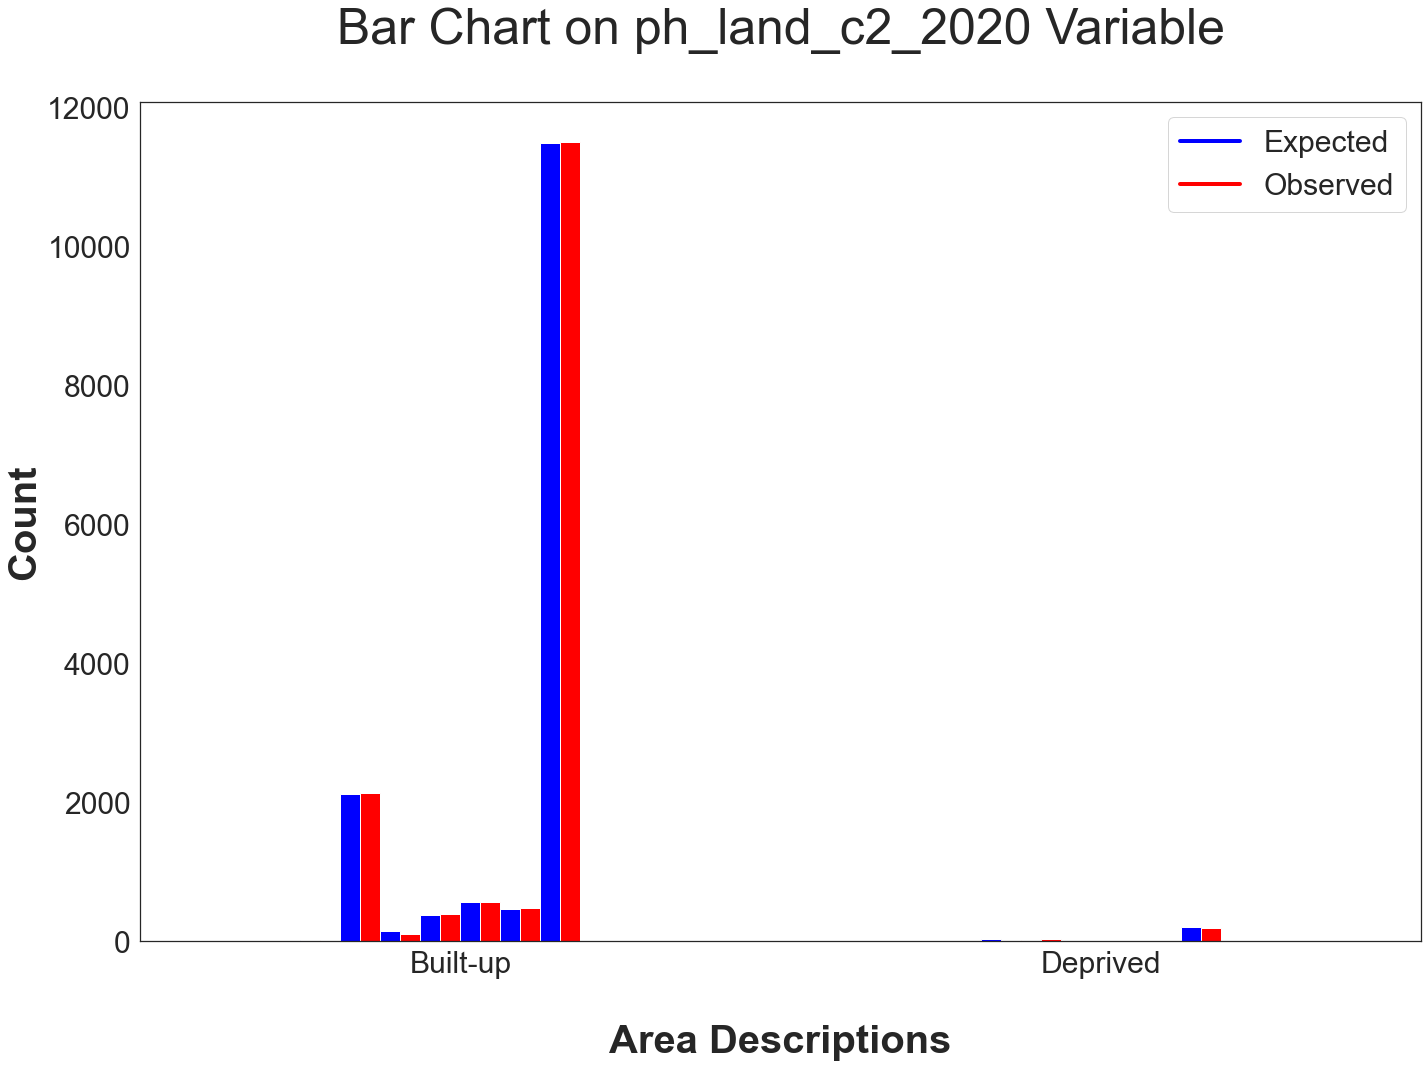

In [104]:
# plot data for first 
plt.figure()
table_4.plot.bar(color = ['blue','red','blue','red','blue','red','blue','red',
                         'blue','red','blue','red','blue','red','blue','red'],xticks=[] ,rot= 90)
plt.title('Bar Chart on ph_land_c2_2020 Variable\n ',fontsize= 50)
plt.ylabel('Count',fontsize= 40)
plt.xticks([0, 1], ['Built-up', 'Deprived'], fontsize= 30)
plt.yticks(fontsize=30)
plt.xlabel('\nArea Descriptions', fontsize=40)
plt.grid(False)
colors = ['blue','red']
lines = [Line2D([0], [0], color=c, linewidth=4) for c in colors]
labels = ['Expected','Observed']
plt.legend(lines,labels,prop={'size': 30})
plt.tight_layout()
plt.show()

In [105]:
crosstab_5 = pd.crosstab(df_cat["Label"], df_cat[" sh_pol_relev_ethnic_gr_2019"], margins= True)
c,p,dof,ex = stats.chi2_contingency(crosstab_5)
print('chi2 statistic for sh_pol_relev_ethnic_gr_2019 was' , round(c,4))
print('The contingency table is\n ', ex)
print('p-value for sh_pol_relev_ethnic_gr_2019 was' , round(p,4))
crosstab_5

chi2 statistic for sh_pol_relev_ethnic_gr_2019 was 977.9108
The contingency table is
  [[8.04e+02 1.44e+04 1.52e+04]
 [1.42e+01 2.55e+02 2.69e+02]
 [8.18e+02 1.47e+04 1.55e+04]]
p-value for sh_pol_relev_ethnic_gr_2019 was 0.0


sh_pol_relev_ethnic_gr_2019  0.0    1.0    All
Label                                          
0                             690  14511  15201
1                             128  141    269  
All                           818  14652  15470

In [106]:
crosstab_5 = crosstab_5.iloc[:-1 , :-1]
crosstab_5.rename(columns= {0:'0_observed',1:'1_observed'},inplace=True)
crosstab_5

sh_pol_relev_ethnic_gr_2019  0_observed  1_observed
Label                                               
0                             690         14511     
1                             128         141

In [107]:
#convert expected value to dataframe
expected_5 = pd.DataFrame(ex)
expected_5 = expected_5.iloc[:-1 , :-1]
expected_5.rename(columns= {0:'0_expected',1:'1_expected'},inplace=True)
expected_5

0_expected    1_expected
0  803.776212  14397.223788
1  14.223788   254.776212

In [108]:
#concatonate observed and expected tables
table_5 = pd.concat([crosstab_5,expected_5], axis=1)

table_5 = table_5[['0_expected','0_observed','1_expected','1_observed']]
table_5

0_expected  0_observed    1_expected  1_observed
0  803.776212  690         14397.223788  14511     
1  14.223788   128         254.776212    141

<Figure size 1440x1080 with 0 Axes>

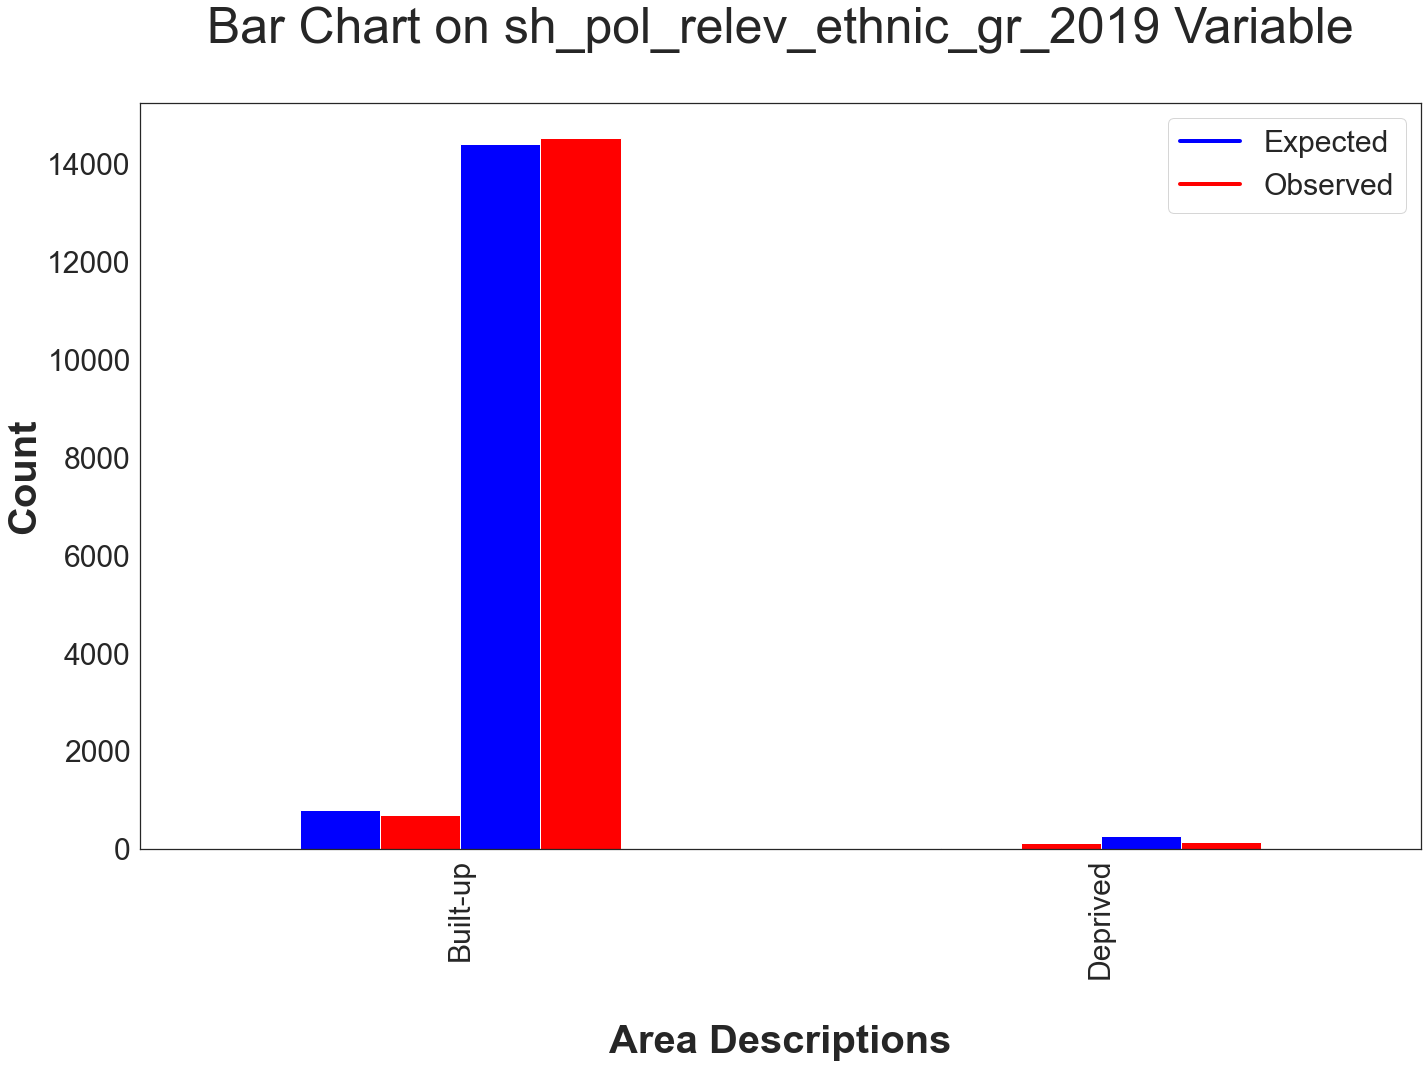

In [109]:
# plot data for first 
plt.figure()
table_5.plot.bar(color = ['blue','red','blue','red','blue','red'],xticks=[] ,rot= 90)
plt.title('Bar Chart on sh_pol_relev_ethnic_gr_2019 Variable\n ',fontsize= 50)
plt.ylabel('Count',fontsize= 40)
plt.xticks([0, 1], ['Built-up', 'Deprived'], fontsize= 30)
plt.yticks(fontsize=30)
plt.xlabel('\nArea Descriptions', fontsize=40)
plt.grid(False)
colors = ['blue','red']
lines = [Line2D([0], [0], color=c, linewidth=4) for c in colors]
labels = ['Expected','Observed']
plt.legend(lines,labels,prop={'size': 30})
plt.tight_layout()
plt.show()

In [110]:
crosstab_6 = pd.crosstab(df_cat["Label"], df_cat[" uu_urb_bldg_2018"], margins= True)
c,p,dof,ex = stats.chi2_contingency(crosstab_6)
print('chi2 statistic for uu_urb_bldg_2018 was' , round(c,4))
print('The contingency table is\n ', ex)
print('p-value for uu_urb_bldg_2018 was' , round(p,4))
crosstab_6

chi2 statistic for uu_urb_bldg_2018 was 200.4331
The contingency table is
  [[5.59e+03 5.29e+02 9.08e+03 1.52e+04]
 [9.90e+01 9.36e+00 1.61e+02 2.69e+02]
 [5.69e+03 5.38e+02 9.24e+03 1.55e+04]]
p-value for uu_urb_bldg_2018 was 0.0


uu_urb_bldg_2018  -1.0  0.0   1.0    All
Label                                    
0                  5689  503  9009  15201
1                  2     35   232   269  
All                5691  538  9241  15470

In [111]:
crosstab_6 = crosstab_6.iloc[:-1 , :-1]
crosstab_6.rename(columns= {-1:'-1_observed',0:'0_observed',1:'1_observed'},inplace=True)
crosstab_6

uu_urb_bldg_2018  -1_observed  0_observed  1_observed
Label                                                 
0                  5689         503         9009      
1                  2            35          232

In [112]:
#convert expected value to dataframe
expected_6 = pd.DataFrame(ex)
expected_6 = expected_6.iloc[:-1 , :-1]
expected_6.rename(columns= {0:'-1_expected',1:'0_expected',2:'1_expected'},inplace=True)
expected_6

-1_expected  0_expected   1_expected
0  5592.042081  528.64499   9080.312928
1  98.957919    9.35501     160.687072

In [113]:
#concatonate observed and expected tables
table_6 = pd.concat([crosstab_6,expected_6], axis=1)

table_6 = table_6[['-1_expected','1_observed', '0_expected','0_observed','1_expected','1_observed']]
table_6

-1_expected  1_observed  0_expected  0_observed   1_expected  1_observed
0  5592.042081  9009        528.64499   503         9080.312928  9009      
1  98.957919    232         9.35501     35          160.687072   232

<Figure size 1440x1080 with 0 Axes>

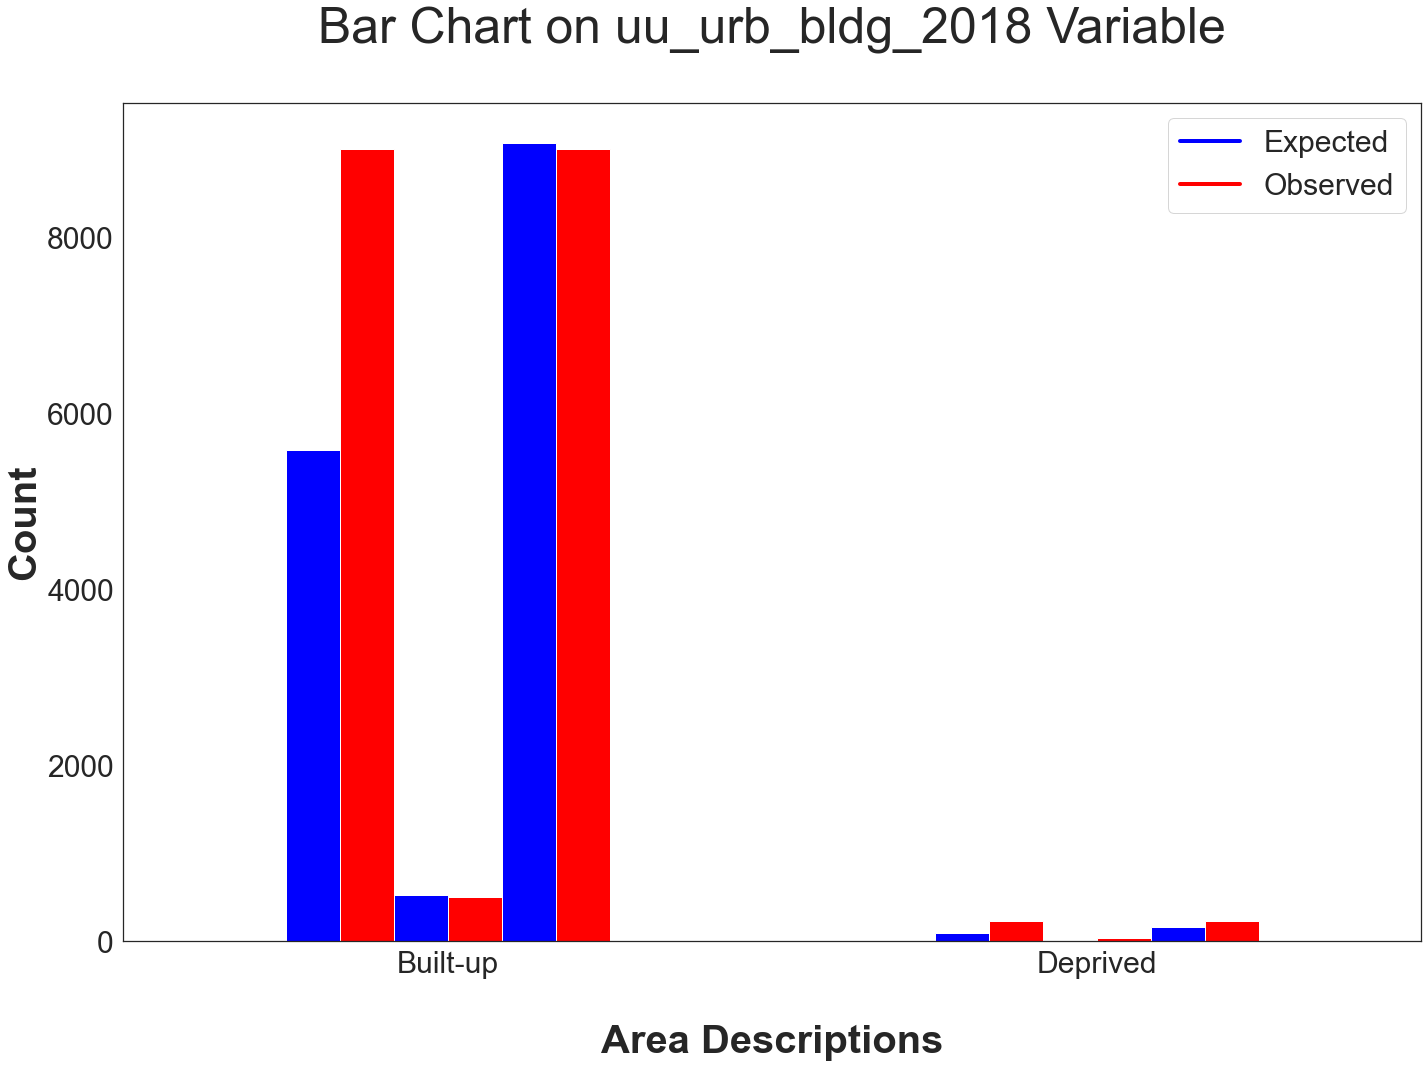

In [118]:
# plot data for first 
plt.figure()
table_6.plot.bar(color = ['blue','red','blue','red','blue','red'], xticks=[] ,rot= 90)
plt.title('Bar Chart on uu_urb_bldg_2018 Variable\n ',fontsize= 50)
plt.ylabel('Count',fontsize= 40)
plt.xticks([0, 1], ['Built-up', 'Deprived'], fontsize= 30)
plt.yticks(fontsize=30)
plt.xlabel('\nArea Descriptions', fontsize=40)
plt.grid(False)
colors = ['blue','red']
lines = [Line2D([0], [0], color=c, linewidth=4) for c in colors]
labels = ['Expected','Observed']
plt.legend(lines,labels,prop={'size': 30})
plt.tight_layout()
plt.show()

In [119]:
df_cat.columns
print(df_cat[' sh_pol_relev_ethnic_gr_2019'].value_counts())
print(df_cat[' uu_urb_bldg_2018'].value_counts())
df_cat[[' sh_pol_relev_ethnic_gr_2019',' uu_urb_bldg_2018']][300:310]


1.0    14652
0.0    818  
Name:  sh_pol_relev_ethnic_gr_2019, dtype: int64
1.0     9241
-1.0    5691
0.0     538 
Name:  uu_urb_bldg_2018, dtype: int64


sh_pol_relev_ethnic_gr_2019  uu_urb_bldg_2018
1851  1.0                          1.0             
1852  1.0                          1.0             
1896  1.0                          1.0             
1897  1.0                         -1.0             
1898  1.0                         -1.0             
1899  1.0                         -1.0             
1900  1.0                          1.0             
1901  1.0                          1.0             
1902  1.0                          1.0             
1903  1.0                          1.0

#  Kolmogorov–Smirnov - Test for Independence on Class 0 and 1 

used the Kolmogorov–Smirnov test to see if distribution of Covariate features follows normal distribution

In [120]:
# independence test on continuous data
df_continuous = df.loc[:, ~df.columns.isin([' fs_electric_dist_2020',' ph_hzd_index_2011',' ph_land_c1_2019',
                  ' ph_land_c2_2020', ' sh_pol_relev_ethnic_gr_2019',' uu_urb_bldg_2018'])]
df_continuous.head()

Label   fs_dist_fs_2020   fs_dist_hf_2019   fs_dist_hf1_2020  \
0  0      31.780069         0.739527          0.724089            
1  0      31.813374         0.994895          0.985522            
2  0      31.773357         0.926415          0.917783            
3  0      31.735663         0.866177          0.854744            
4  0      31.698177         0.811470          0.797522            

    fs_dist_market_2020   fs_dist_mosques_2017   fs_dist_school_2020  \
0  2.688592              4.286776               11.415614              
1  2.950744              4.480880               11.294726              
2  2.884460              4.443317               11.304877              
3  2.819666              4.407386               11.315222              
4  2.756468              4.373125               11.326365              

    fs_dist_school1_2018   fs_dist_well_2018   in_dist_rd_2016  \
0  1.205231               2.369100            0.583              
1  1.439247               2.656430            0.825              
2  1.349879               2.575939            0.743              
3  1.260993               2.496295            0.651              
4  1.172700               2.417583            0.560              

    in_dist_rd_intersect_2016   in_dist_waterway_2016   in_night_light_2016  \
0  18.129000                   12.066                  2.265071               
1  18.056999                   12.357                  1.786768               
2  18.049999                   12.268                  2.265071               
3  18.042999                   12.179                  2.265071               
4  18.035999                   12.089                  2.265071               

    ph_base_water_2010   ph_bio_dvst_2015   ph_climate_risk_2020  \
0  0.0                  0.286720           103.370560              
1  0.0                  0.289738           103.442802              
2  0.0                  0.288260           103.370560              
3  0.0                  0.286658           103.370560              
4  0.0                  0.284906           103.370560              

    ph_dist_aq_veg_2015   ph_dist_art_surface_2015   ph_dist_bare_2015  \
0  20.921000             0.464                      81.175003            
1  21.132000             0.414                      80.906998            
2  21.089001             0.382                      80.999001            
3  21.046000             0.371                      81.091003            
4  21.003000             0.371                      81.182999            

    ph_dist_cultivated_2015   ph_dist_herb_2015   ph_dist_inland_water_2018  \
0 -0.371                     29.035999           0.586                        
1 -0.293                     29.257999           0.464                        
2 -0.278                     29.172001           0.464                        
3 -0.278                     29.087000           0.473                        
4 -0.278                     29.000999           0.499                        

    ph_dist_open_coast_2020   ph_dist_riv_network_2007   ph_dist_shrub_2015  \
0  56.499001                 0.646436                   12.738                
1  56.410999                 0.692578                   13.023                
2  56.409000                 0.636535                   12.944                
3  56.408001                 0.592647                   12.864                
4  56.407001                 0.559894                   12.785                

    ph_dist_sparse_veg_2015   ph_dist_woody_tree_2015   ph_grd_water_2000  \
0  93.734001                 10.195                    0.263034             
1  93.463997                 10.131                    0.263034             
2  93.533997                 10.178                    0.263034             
3  93.603996                 10.226                    0.263034             
4  93.674004                 10.274                    0.263034             

    ph_max_tem_2019   ph_ndv

In [121]:
deprived = df_continuous[df_continuous['Label']==1]
deprived = deprived.drop('Label',axis=1)
built_up = df_continuous[df_continuous['Label']==0]
built_up = built_up.drop('Label',axis=1)

In [125]:
# Check Normality of Covariate features for deprived area
Norm= []
Norm_col = []
for col in deprived.columns: 
    Norm_col.append(col)
    Norm.append(kstest(deprived[col],'norm'))
norm = pd.DataFrame (Norm, columns = ['Statistics','p-value'])
norm_col= pd.DataFrame (Norm_col, columns = ['Covariate_features'])
normal_check_deprived = norm_col.merge(norm, left_index=True, right_index=True)
normal_check_deprived['p-value']= round(normal_check_deprived['p-value'],4)
normal_check_deprived.head()

Covariate_features  Statistics  p-value
0   fs_dist_fs_2020       0.671464    0.0    
1   fs_dist_hf_2019       0.570324    0.0    
2   fs_dist_hf1_2020      0.518346    0.0    
3   fs_dist_market_2020   0.533216    0.0    
4   fs_dist_mosques_2017  0.514628    0.0

In [126]:
# Check Normality of Built-up variable
Norm= []
Norm_col = []
for col in built_up.columns: 
    Norm_col.append(col)
    Norm.append(kstest(built_up[col],'norm'))
norm = pd.DataFrame (Norm, columns = ['Statistics','p-value'])
norm_col= pd.DataFrame (Norm_col, columns = ['Covariate_features'])
normal_check_built_up = norm_col.merge(norm, left_index=True, right_index=True)
normal_check_built_up['p-value']= round(normal_check_built_up['p-value'],4)
normal_check_built_up.head()

Covariate_features  Statistics  p-value
0   fs_dist_fs_2020       0.660180    0.0    
1   fs_dist_hf_2019       0.601359    0.0    
2   fs_dist_hf1_2020      0.529499    0.0    
3   fs_dist_market_2020   0.539013    0.0    
4   fs_dist_mosques_2017  0.579969    0.0

# Levene Test - Equal Variance Test for Class 0 and 1

Conducted levene test for equality of variance amongst the Covariate features to confirm assumption that there is a difference in variance between the deprived and built up areas

In [127]:
# checking equality of variance 
levene = []
f_value = []
p_value = []
for col in df_continuous.columns[1:]:   
    den = df_continuous[['Label',col]]
    den_0 = den[den['Label']==0]
    den_1 = den[den['Label']==1]
    den_full = [den_0,den_1]
    fvalue, pvalue = stats.levene(den_0[col], den_1[col])
    levene.append(col)
    f_value.append(fvalue)
    p_value.append(pvalue)
df_levene = pd.DataFrame({'Covariate_features': levene, 
                   'fvalue': f_value,
                    'p_value': p_value})
df_levene['p_value'] = round(df_levene['p_value'],4)

# compare ranks for levene score
df_levene = df_levene.merge(best[['Covariate_features','rank']], on = 'Covariate_features')
df_levene.p_value = round(df_levene.p_value,4)
df_levene = df_levene.sort_values('rank').reset_index(drop=True)
df_levene.head(60)



Covariate_features       fvalue  p_value  rank
0    uu_bld_den_2020            1977.301629  0.0000   1   
1    ses_odef_2018              7.895094     0.0050   2   
2    uu_bld_count_2020          1977.884400  0.0000   3   
3    ses_impr_water_src_2016    62.041799    0.0000   4   
4    ses_dpt3_2018              134.473884   0.0000   5   
5    ph_dist_aq_veg_2015        11.060358    0.0009   6   
6    ph_dist_herb_2015          144.726813   0.0000   7   
7    ph_dist_cultivated_2015    236.267045   0.0000   8   
8    ses_child_stunted_2018     26.459380    0.0000   9   
9    ses_measles_2018           67.088443    0.0000   10  
10   in_dist_waterway_2016      10.655375    0.0011   11  
11   in_night_light_2016        68.543108    0.0000   12  
12   fs_dist_school_2020        43.628073    0.0000   13  
13   ses_w_lit_2018             51.345070    0.0000   14  
14   ses_unmet_need_2018        7.640789     0.0057   15  
15   ses_w_anemia_2018          76.543260    0.0000   16  
16   fs_dist_well_2018          47.758338    0.0000   17  
17   sh_dist_conflict_2020      8.043633     0.0046   18  
18   ph_dist_art_surface_2015   174.406102   0.0000   19  
19   ph_dist_bare_2015          48.788757    0.0000   20  
20   sh_dist_mnr_pofw_2019      31.411800    0.0000   21  
21   ses_an_visits_2016         164.263629   0.0000   22  
22   ses_m_lit_2018             53.620784    0.0000   23  
23   ph_climate_risk_2020       6.232460     0.0126   24  
24   ph_max_tem_2019            62.373931    0.0000   25  
25   uu_impr_housing_2015       106.783025   0.0000   26  
26   ph_dist_sparse_veg_2015    22.892403    0.0000   27  
27   fs_dist_market_2020        76.619053    0.0000   28  
28   ses_pfpr_2017              34.239500    0.0000   29  
29   in_dist_rd_2016            7.771726     0.0053   30  
30   ses_hf_delivery_2018       73.786716    0.0000   31  
31   ph_pm25_2016               157.538119   0.0000   32  
32   ph_dist_inland_water_2018  25.937433    0.0000   33  
33   fs_dist_fs_2020            109.236917   0.0000   34  
34   ph_dist_woody_tree_2015    97.340241    0.0000   35  
35   in_dist_rd_intersect_2016  37.162332    0.0000   36  
36   ph_dist_open_coast_2020    54.038888    0.0000   37  
37   po_pop_fb_2018             1.118765     0.2902   38  
38   fs_dist_hf_2019            50.117878    0.0000   39  
39   ses_ITN_2016               53.117705    0.0000   40  
40   ph_dist_riv_network_2007   145.967681   0.0000   41  
41   sh_dist_pofw_2019          43.489518    0.0000   42  
42   ph_dist_shrub_2015         34.337472    0.0000   43  
43   fs_dist_mosques_2017       7.033619     0.0080   44  
44   ph_ndvi_2019               0.418892     0.5175   45  
45   ses_preg_2017              7.562135     0.0060   46  
46   fs_dist_school1_2018       81.336450    0.0000   47  
47   sh_ethno_den_2020          34.109568    0.0000   49  
48   ph_slope_2000              7.800832     0.0052   51  
49   po_pop_un_2020             3.056666     0.0804   52  
50   ph_grd_water_2000          764.191080   0.0000   54  
51   ph_bio_dvst_2015           0.446782     0.5039   55  
52   ph_base_water_2010         0.214564     0.6432   56  
53   fs_dist_hf1_2020           69.306210    0.0000   58

# Kruskal-Wallis H-Test 

In [128]:
# create dataframe that runs Kruskal-Wallis H test test for each covariate feature on each value
b = []
f_value = []
p_value = []
for col in df_continuous.columns[1:]:   
    den = df_continuous[['Label',col]]
    den_0 = den[den['Label']==0]
    den_1 = den[den['Label']==1]
    den_full = [den_0,den_1]
    fvalue, pvalue = stats.kruskal(den_0[col], den_1[col])
    b.append(col)
    f_value.append(fvalue)
    p_value.append(pvalue)
fd = pd.DataFrame({'Covariate_features': b, 
                   'fvalue': f_value,
                    'p_value': p_value})

In [129]:
fd.p_value = round(fd.p_value,4)
fd = fd.sort_values('p_value').reset_index(drop=True)
fd.head(60)

Covariate_features      fvalue  p_value
0    fs_dist_fs_2020            66.726099   0.0000 
1    ph_max_tem_2019            166.598503  0.0000 
2    ph_pm25_2016               23.525130   0.0000 
3    ph_slope_2000              21.982525   0.0000 
4    po_pop_fb_2018             98.283053   0.0000 
5    po_pop_un_2020             52.314833   0.0000 
6    ses_child_stunted_2018     78.729691   0.0000 
7    ses_dpt3_2018              79.495078   0.0000 
8    ses_hf_delivery_2018       69.333961   0.0000 
9    ses_impr_water_src_2016    78.667746   0.0000 
10   uu_bld_den_2020            611.460844  0.0000 
11   ses_ITN_2016               145.628189  0.0000 
12   ses_measles_2018           36.704869   0.0000 
13   ses_odef_2018              126.762289  0.0000 
14   ses_unmet_need_2018        35.772156   0.0000 
15   ses_w_anemia_2018          42.782991   0.0000 
16   ses_w_lit_2018             56.947667   0.0000 
17   sh_dist_conflict_2020      48.989649   0.0000 
18   sh_dist_mnr_pofw_2019      79.753648   0.0000 
19   sh_dist_pofw_2019          73.450027   0.0000 
20   uu_bld_count_2020          615.924232  0.0000 
21   ses_m_lit_2018             18.603379   0.0000 
22   ph_dist_shrub_2015         25.081133   0.0000 
23   ph_grd_water_2000          710.393586  0.0000 
24   in_night_light_2016        41.745062   0.0000 
25   fs_dist_hf_2019            46.220576   0.0000 
26   fs_dist_hf1_2020           126.980917  0.0000 
27   fs_dist_market_2020        91.744793   0.0000 
28   fs_dist_mosques_2017       93.603850   0.0000 
29   fs_dist_school_2020        57.115847   0.0000 
30   fs_dist_school1_2018       216.530424  0.0000 
31   fs_dist_well_2018          231.350139  0.0000 
32   in_dist_waterway_2016      102.880600  0.0000 
33   ph_dist_riv_network_2007   91.043424   0.0000 
34   uu_impr_housing_2015       17.691984   0.0000 
35   ph_dist_inland_water_2018  150.721046  0.0000 
36   ph_dist_art_surface_2015   35.070276   0.0000 
37   ph_dist_herb_2015          88.984621   0.0000 
38   ph_dist_aq_veg_2015        27.495771   0.0000 
39   ph_dist_cultivated_2015    43.591615   0.0000 
40   in_dist_rd_2016            14.539091   0.0001 
41   ph_dist_bare_2015          13.133809   0.0003 
42   ses_preg_2017              10.813699   0.0010 
43   ph_ndvi_2019               7.541811    0.0060 
44   ses_an_visits_2016         5.420098    0.0199 
45   ses_pfpr_2017              3.427023    0.0641 
46   ph_dist_sparse_veg_2015    3.397974    0.0653 
47   ph_dist_woody_tree_2015    3.264419    0.0708 
48   ph_dist_open_coast_2020    2.405581    0.1209 
49   sh_ethno_den_2020          2.045454    0.1527 
50   ph_climate_risk_2020       1.136886    0.2863 
51   ph_bio_dvst_2015           0.284968    0.5935 
52   ph_base_water_2010         0.079075    0.7786 
53   in_dist_rd_intersect_2016  0.015016    0.9025

In [130]:
FD = fd.merge(best[['Covariate_features','rank']], on = 'Covariate_features')
FD.p_value = round(FD.p_value,4)
FD = FD.sort_values('rank').reset_index(drop=True)
FD.head(60)

Covariate_features      fvalue  p_value  rank
0    uu_bld_den_2020            611.460844  0.0000   1   
1    ses_odef_2018              126.762289  0.0000   2   
2    uu_bld_count_2020          615.924232  0.0000   3   
3    ses_impr_water_src_2016    78.667746   0.0000   4   
4    ses_dpt3_2018              79.495078   0.0000   5   
5    ph_dist_aq_veg_2015        27.495771   0.0000   6   
6    ph_dist_herb_2015          88.984621   0.0000   7   
7    ph_dist_cultivated_2015    43.591615   0.0000   8   
8    ses_child_stunted_2018     78.729691   0.0000   9   
9    ses_measles_2018           36.704869   0.0000   10  
10   in_dist_waterway_2016      102.880600  0.0000   11  
11   in_night_light_2016        41.745062   0.0000   12  
12   fs_dist_school_2020        57.115847   0.0000   13  
13   ses_w_lit_2018             56.947667   0.0000   14  
14   ses_unmet_need_2018        35.772156   0.0000   15  
15   ses_w_anemia_2018          42.782991   0.0000   16  
16   fs_dist_well_2018          231.350139  0.0000   17  
17   sh_dist_conflict_2020      48.989649   0.0000   18  
18   ph_dist_art_surface_2015   35.070276   0.0000   19  
19   ph_dist_bare_2015          13.133809   0.0003   20  
20   sh_dist_mnr_pofw_2019      79.753648   0.0000   21  
21   ses_an_visits_2016         5.420098    0.0199   22  
22   ses_m_lit_2018             18.603379   0.0000   23  
23   ph_climate_risk_2020       1.136886    0.2863   24  
24   ph_max_tem_2019            166.598503  0.0000   25  
25   uu_impr_housing_2015       17.691984   0.0000   26  
26   ph_dist_sparse_veg_2015    3.397974    0.0653   27  
27   fs_dist_market_2020        91.744793   0.0000   28  
28   ses_pfpr_2017              3.427023    0.0641   29  
29   in_dist_rd_2016            14.539091   0.0001   30  
30   ses_hf_delivery_2018       69.333961   0.0000   31  
31   ph_pm25_2016               23.525130   0.0000   32  
32   ph_dist_inland_water_2018  150.721046  0.0000   33  
33   fs_dist_fs_2020            66.726099   0.0000   34  
34   ph_dist_woody_tree_2015    3.264419    0.0708   35  
35   in_dist_rd_intersect_2016  0.015016    0.9025   36  
36   ph_dist_open_coast_2020    2.405581    0.1209   37  
37   po_pop_fb_2018             98.283053   0.0000   38  
38   fs_dist_hf_2019            46.220576   0.0000   39  
39   ses_ITN_2016               145.628189  0.0000   40  
40   ph_dist_riv_network_2007   91.043424   0.0000   41  
41   sh_dist_pofw_2019          73.450027   0.0000   42  
42   ph_dist_shrub_2015         25.081133   0.0000   43  
43   fs_dist_mosques_2017       93.603850   0.0000   44  
44   ph_ndvi_2019               7.541811    0.0060   45  
45   ses_preg_2017              10.813699   0.0010   46  
46   fs_dist_school1_2018       216.530424  0.0000   47  
47   sh_ethno_den_2020          2.045454    0.1527   49  
48   ph_slope_2000              21.982525   0.0000   51  
49   po_pop_un_2020             52.314833   0.0000   52  
50   ph_grd_water_2000          710.393586  0.0000   54  
51   ph_bio_dvst_2015           0.284968    0.5935   55  
52   ph_base_water_2010         0.079075    0.7786   56  
53   fs_dist_hf1_2020           126.980917  0.0000   58

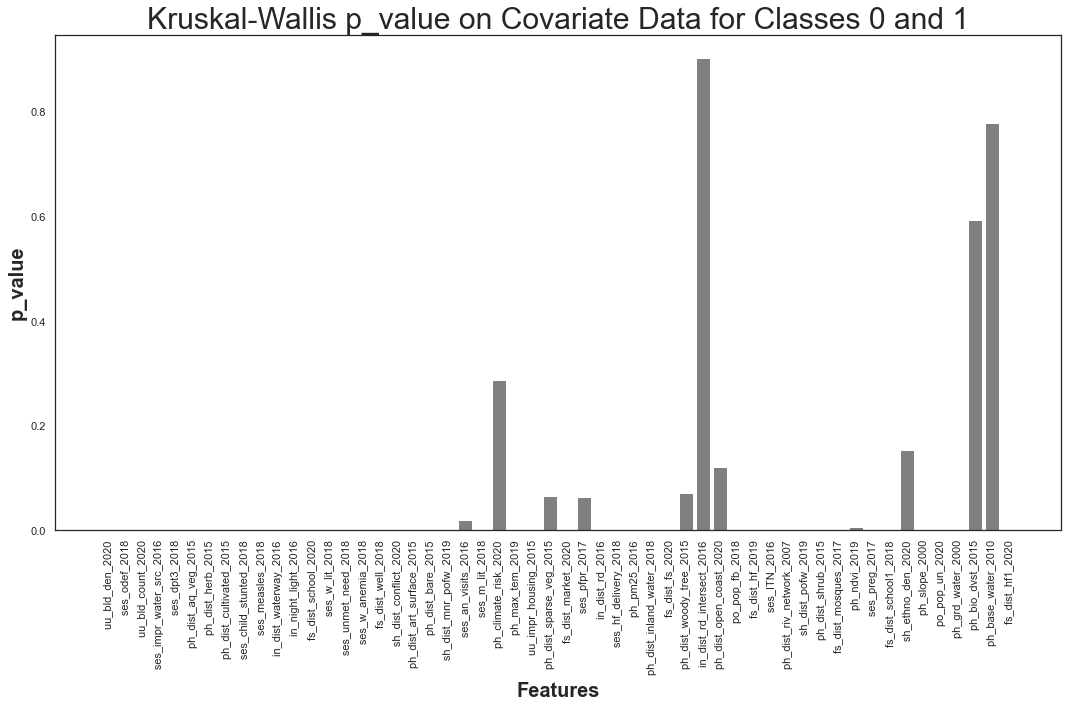

In [131]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(FD['Covariate_features'], FD['p_value'], color='grey')

# Set x-axis
plt.title('Kruskal-Wallis p_value on Covariate Data for Classes 0 and 1', fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('p_value',fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

In [132]:
#FD['group'] = FD['1'].iloc
FD.reset_index(inplace=True,drop=True)
ex_1 = ['group_1']*27
ex_2 = ['group_2']*28
ex = ex_1 + ex_2

ex = pd.DataFrame(ex,columns=['groups'])

In [133]:
FD = FD.merge(ex, left_index= True, right_index= True)
FD.head()

Covariate_features      fvalue  p_value  rank   groups
0   uu_bld_den_2020          611.460844  0.0      1     group_1
1   ses_odef_2018            126.762289  0.0      2     group_1
2   uu_bld_count_2020        615.924232  0.0      3     group_1
3   ses_impr_water_src_2016  78.667746   0.0      4     group_1
4   ses_dpt3_2018            79.495078   0.0      5     group_1

# Boxplot

In [134]:
# created boxplots in this section for deprived and built up for selected covariate features

In [135]:
def boxplot_graph(data, feature = ''):
    den = data[['Label',feature]]
    den_0 = den[den['Label']==0]
    den_0.reset_index(inplace=True,drop=True)
    den_1 = den[den['Label']==1]
    den_1.reset_index(inplace=True,drop=True)
    den_full = [den_0[feature],
                den_1[feature]]

    # stats f_oneway functions takes the groups as input and returns ANOVA F and p value
    fvalue, pvalue = stats.kruskal(den_0[feature], den_1[feature])
    print('the Kruskal-wallis test statistic is', round(fvalue,4), 'with a p-value of',round(pvalue,4))

    plt.figure()
    plt.boxplot(den_full)
    plt.title('Box Plot on' +feature+ ' Variable\n ',fontsize= 60)
    plt.ylabel('Count of Building Density',fontsize= 40)
    plt.xticks([1, 2], ['Built-up', 'Deprived'], fontsize= 30)
    plt.yticks(fontsize=30)
    plt.xlabel('Area Descriptions', fontsize=40)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

the Kruskal-wallis test statistic is 126.7623 with a p-value of 0.0


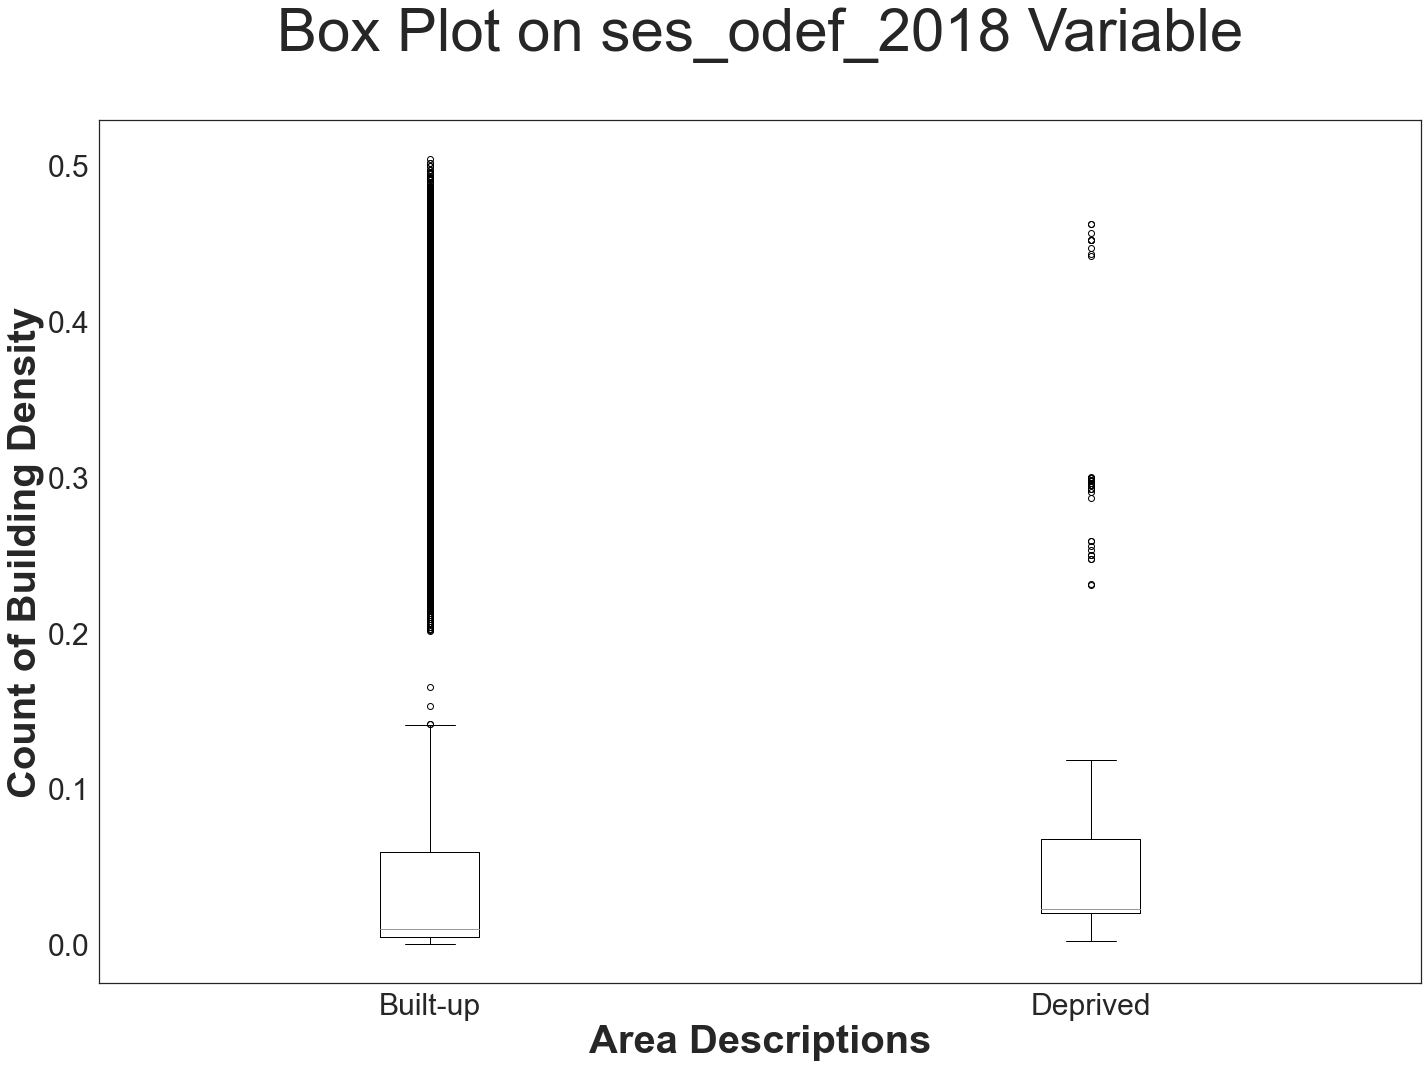

In [136]:
boxplot_graph(df,feature= ' ses_odef_2018')

the Kruskal-wallis test statistic is 611.4608 with a p-value of 0.0


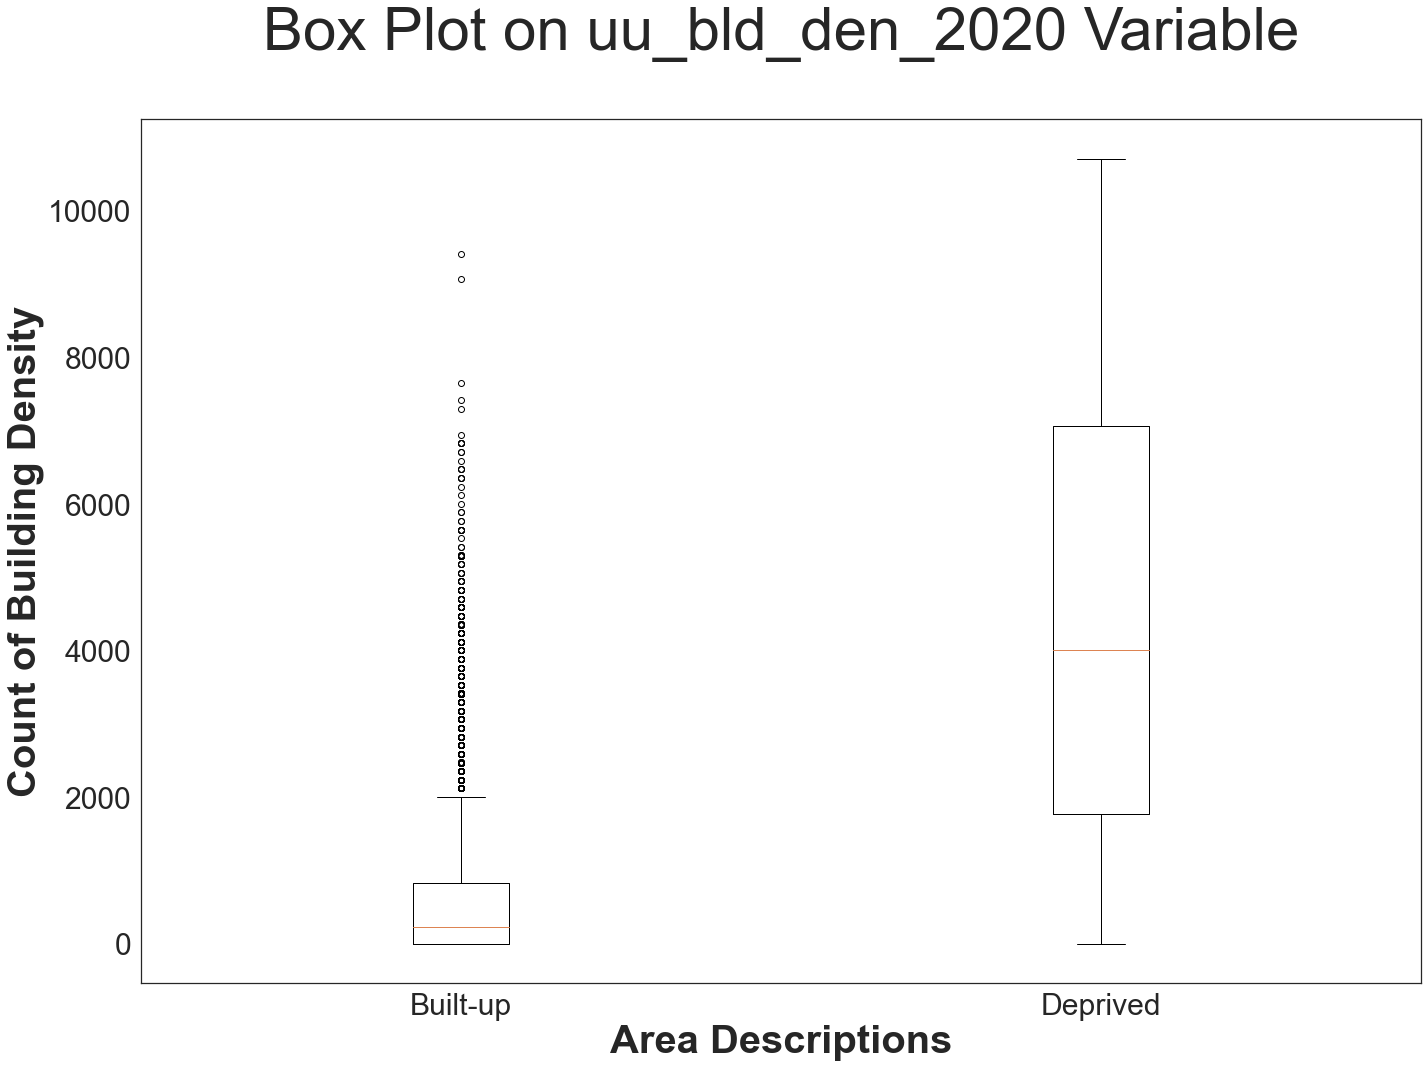

In [137]:
boxplot_graph(df,feature= ' uu_bld_den_2020')

the Kruskal-wallis test statistic is 126.7623 with a p-value of 0.0


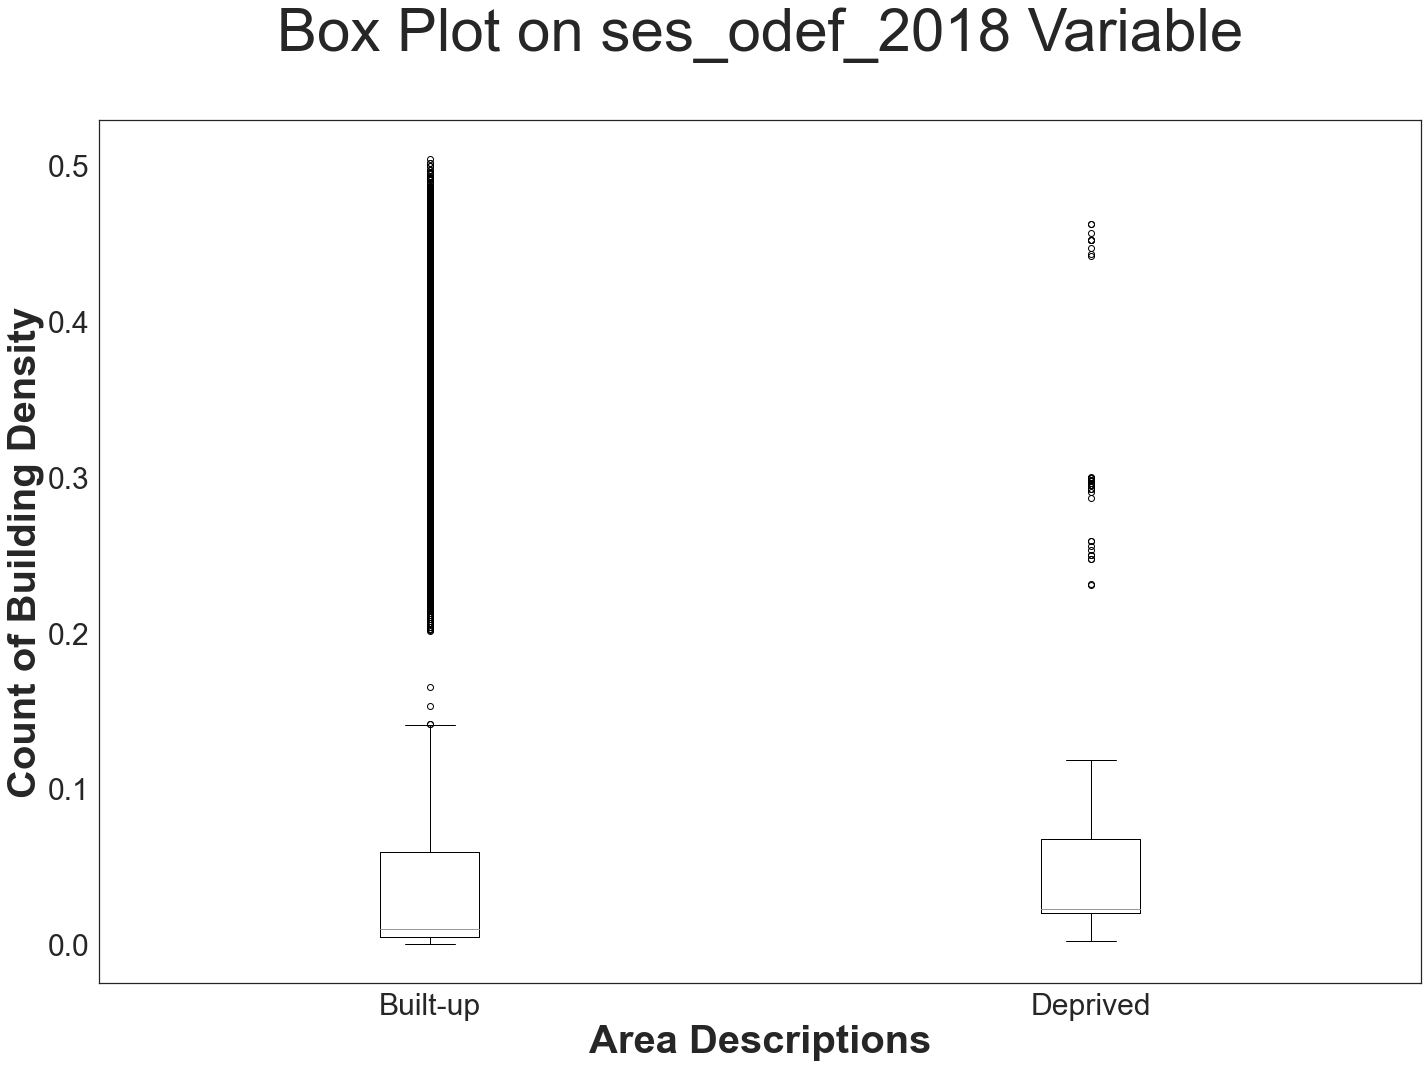

In [138]:
boxplot_graph(df,feature= ' ses_odef_2018')



the Kruskal-wallis test statistic is 78.6677 with a p-value of 0.0


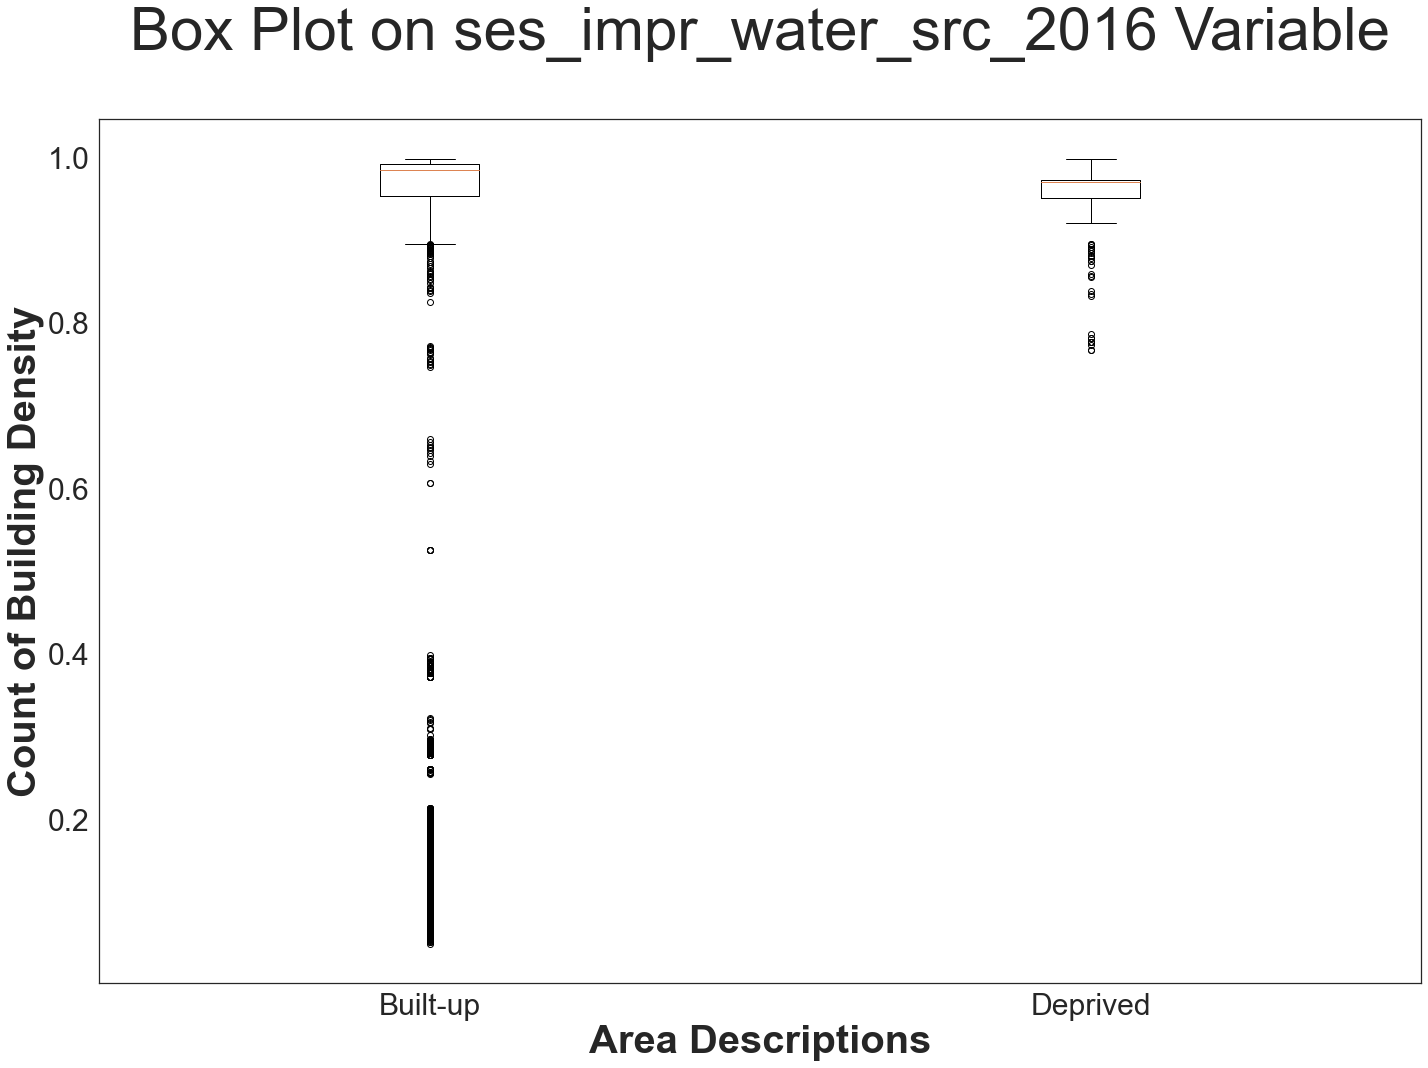

In [139]:
boxplot_graph(df,feature= ' ses_impr_water_src_2016')


the Kruskal-wallis test statistic is 27.4958 with a p-value of 0.0


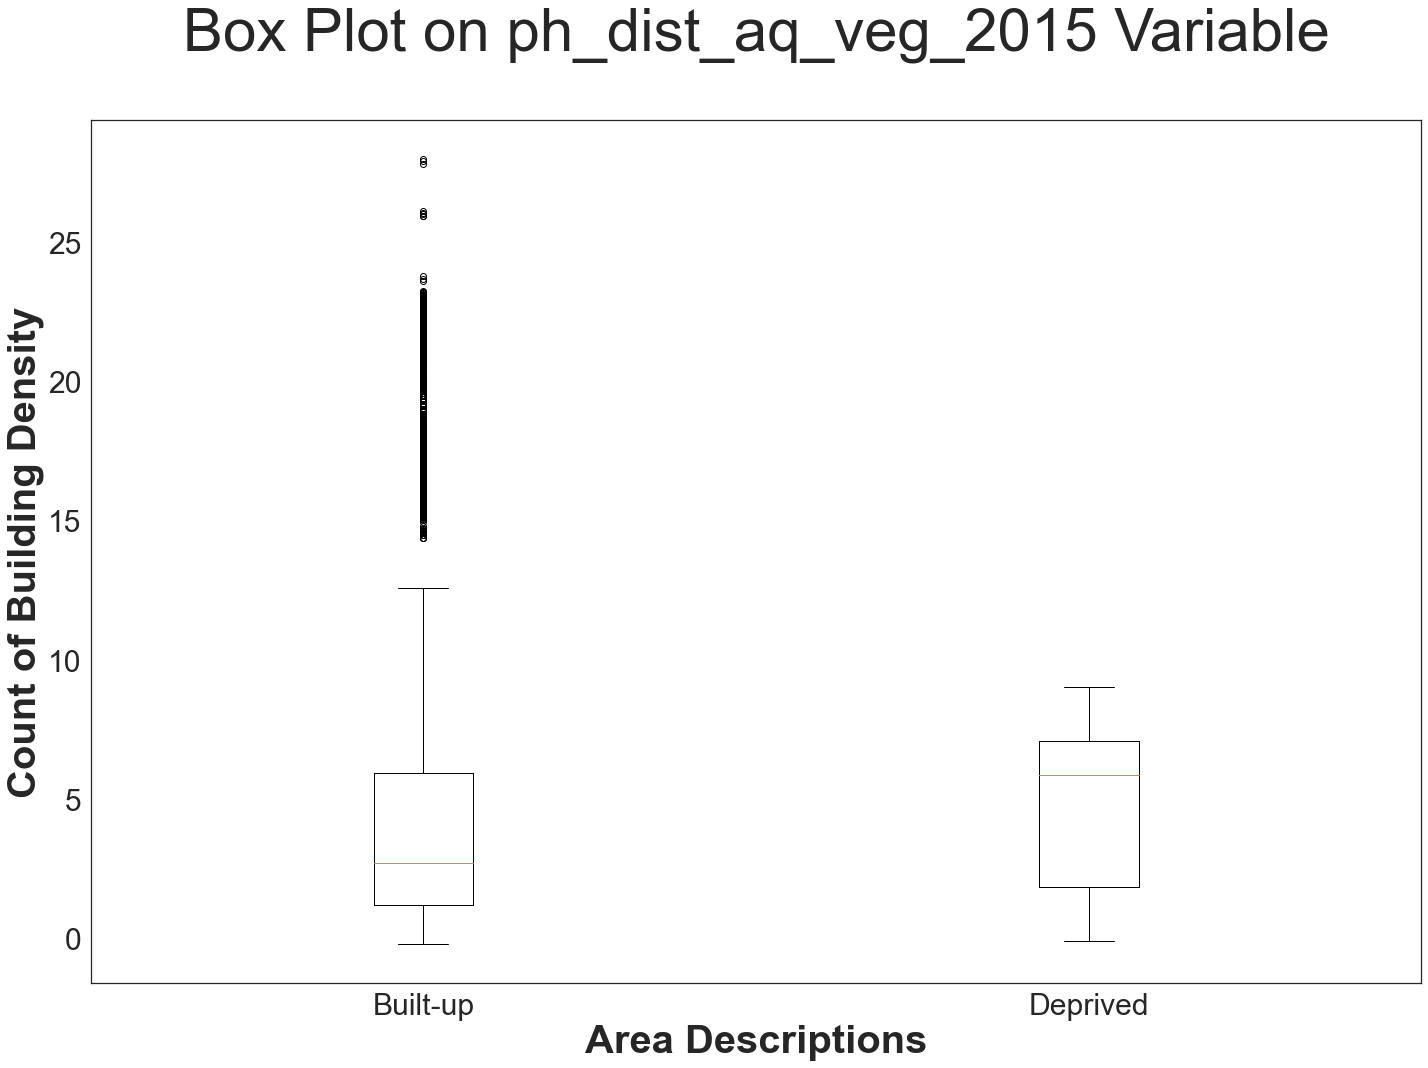

In [140]:
boxplot_graph(df,feature= ' ph_dist_aq_veg_2015')


the Kruskal-wallis test statistic is 36.7049 with a p-value of 0.0


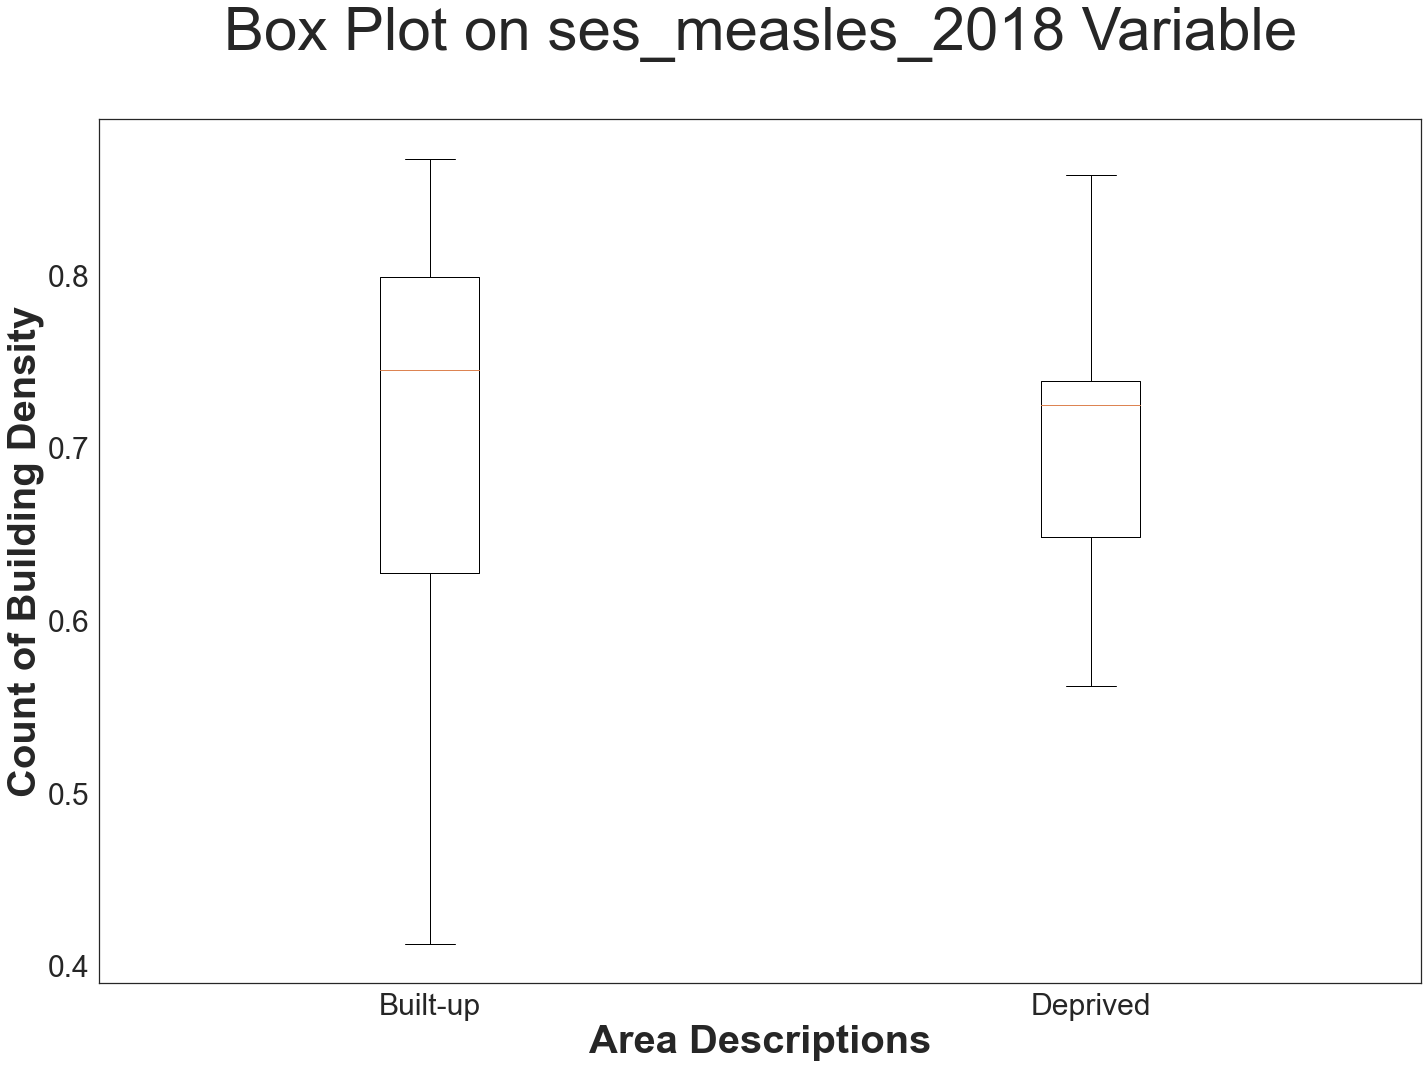

In [141]:
boxplot_graph(df,feature= ' ses_measles_2018')


the Kruskal-wallis test statistic is 615.9242 with a p-value of 0.0


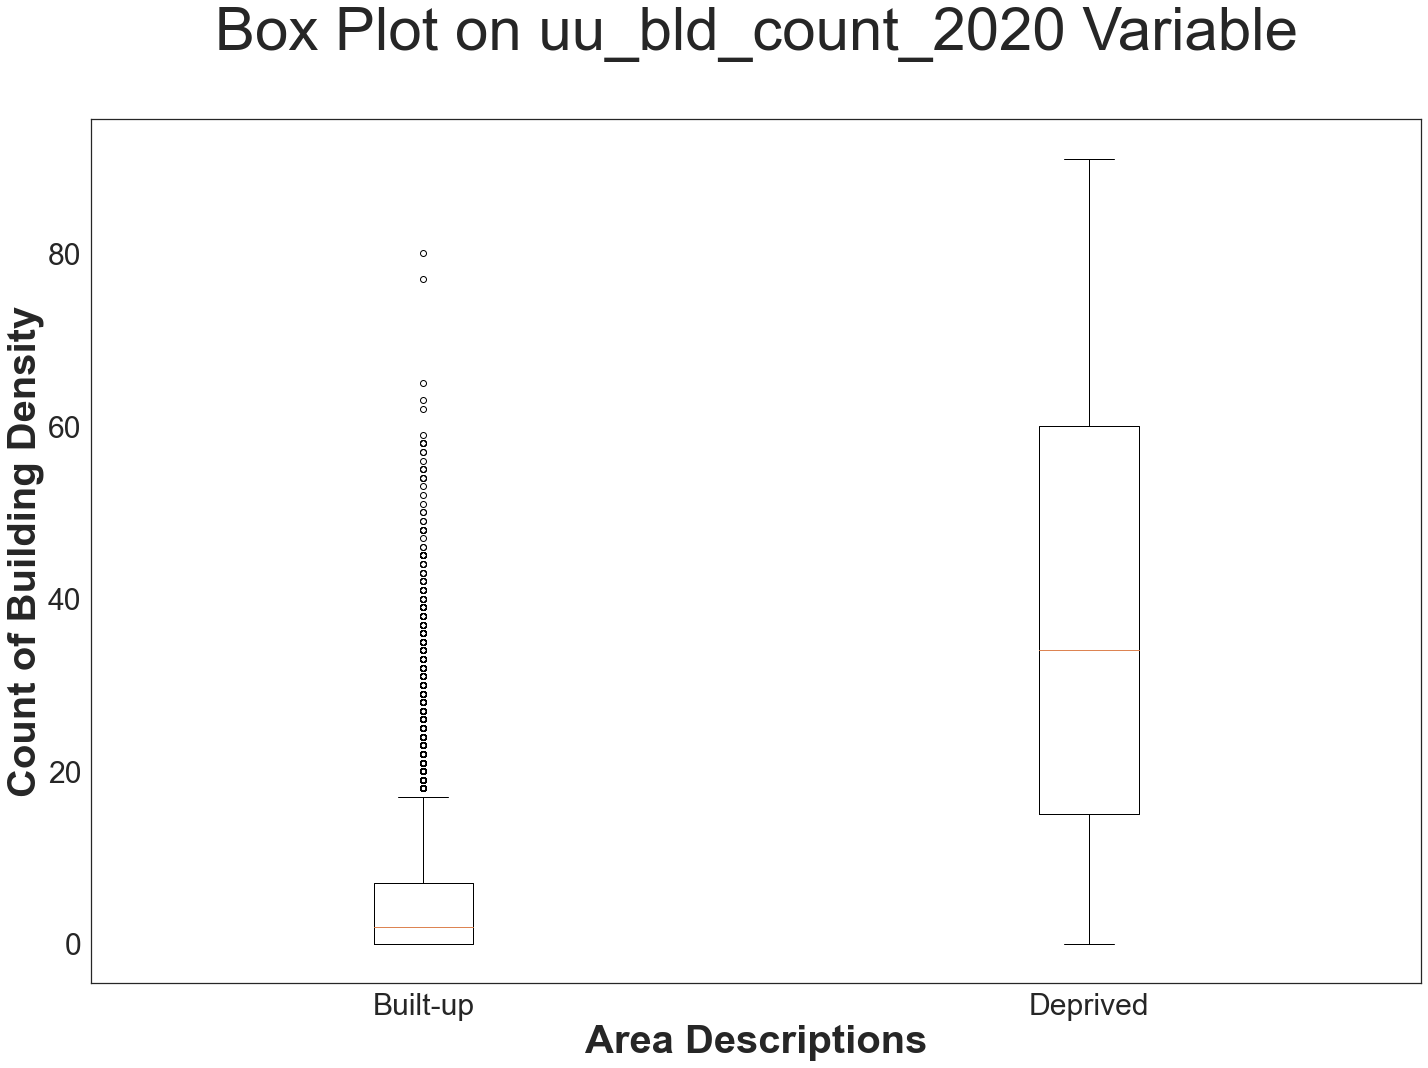

In [142]:
boxplot_graph(df,feature= ' uu_bld_count_2020')

the Kruskal-wallis test statistic is 231.3501 with a p-value of 0.0


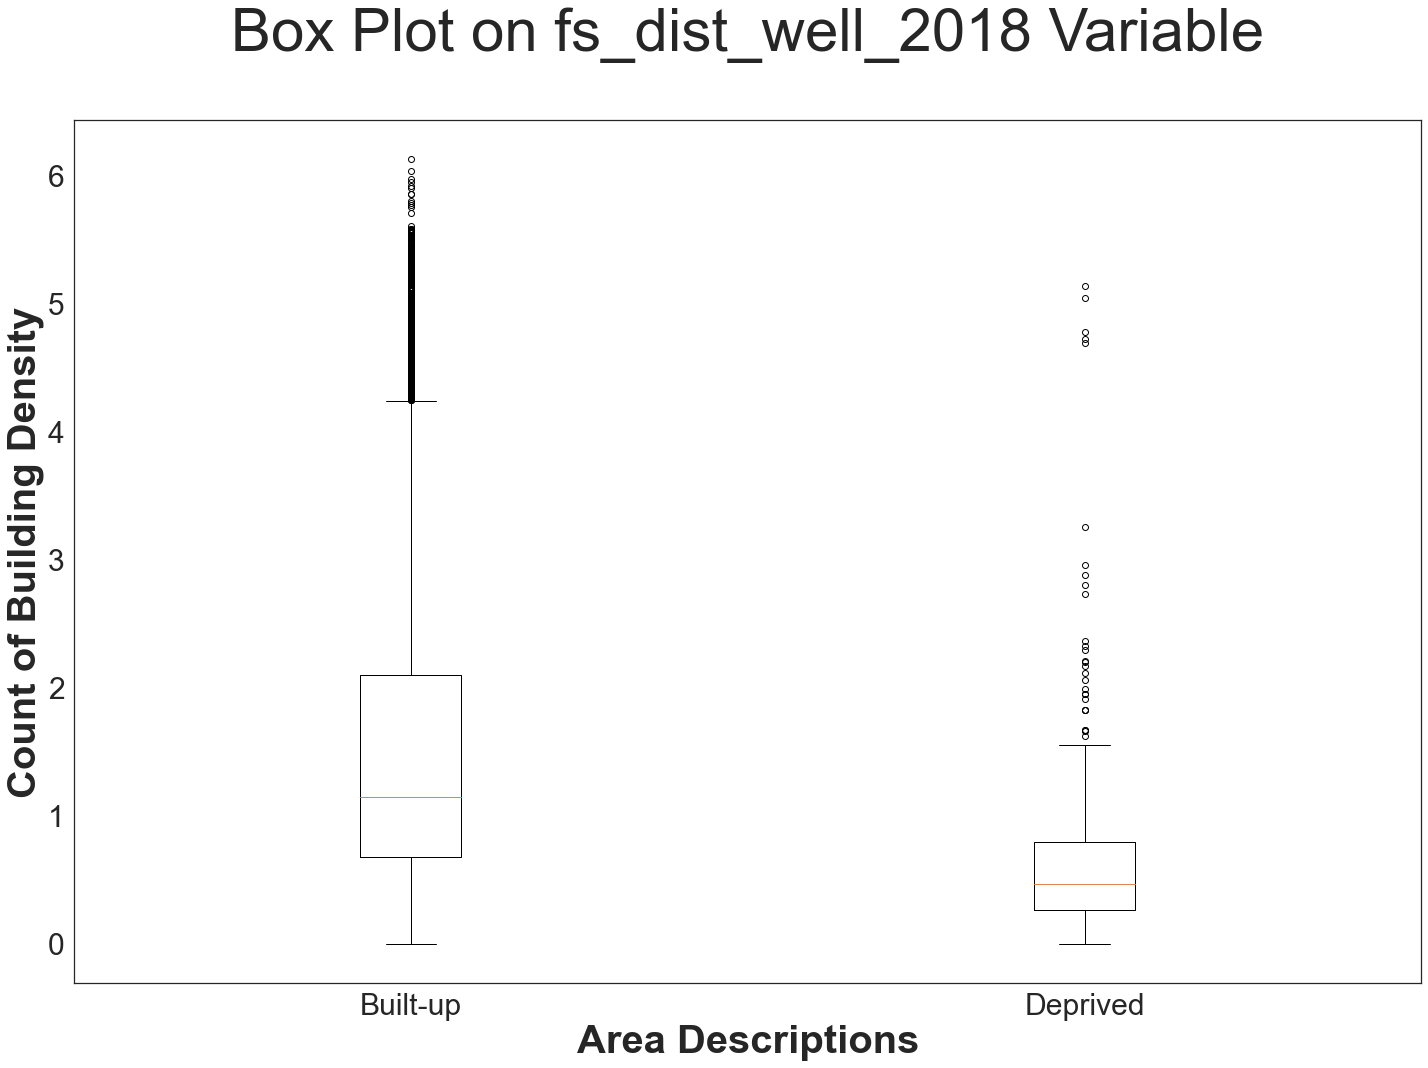

In [143]:
boxplot_graph(df,feature= ' fs_dist_well_2018')


In [153]:
from scipy.special import boxcox, inv_boxcox

inv_boxcox(deprived[' fs_dist_well_2018'])



TypeError: inv_boxcox() takes from 2 to 3 positional arguments but 1 were given

fs_dist_fs_2020   fs_dist_hf_2019   fs_dist_hf1_2020  \
8346   7.936027          3.002586          0.370840            
8840   7.591577          3.196185          0.293175            
8841   7.678029          3.108075          0.207306            
9013   7.566507          3.178369          0.278130            
9177   7.627808          3.073508          0.207306            
...         ...               ...               ...            
47362  5.171161          0.287858          0.092710            
47371  5.564908          1.205077          0.839525            
47372  5.610648          0.754330          0.382253            
47381  5.705114          0.956894          0.586350            
47394  5.733223          1.338609          0.967921            

        fs_dist_market_2020   fs_dist_mosques_2017   fs_dist_school_2020  \
8346   1.131670              4.016604               4.015909               
8840   1.131670              4.204787               3.875198               
8841   1.057057              4.114907               3.835899               
9013   1.081176              4.183269               3.794736               
9177   0.954508              4.072917               3.669393               
...         ...                   ...                    ...               
47362  2.654812              0.207306               2.703129               
47371  2.909678              0.834391               3.125411               
47372  2.875507              0.463550               3.155666               
47381  3.031208              0.668542               3.305895               
47394  3.049583              0.764507               3.277933               

        fs_dist_school1_2018   fs_dist_well_2018   in_dist_rd_2016  \
8346   0.207306               1.291302            1.237              
8840   0.000000               1.402958            1.080              
8841   0.092710               1.494905            1.036              
9013   0.092710               1.393738            0.998              
9177   0.092710               1.465875            0.873              
...         ...                    ...              ...              
47362  0.185420               0.092710            2.032              
47371  0.185420               0.839525            2.597              
47372  0.207306               0.382253            2.337              
47381  0.293175               0.586350            2.518              
47394  0.092710               0.967921            2.785              

        in_dist_rd_intersect_2016   in_dist_waterway_2016  \
8346   7.187                       13.838                   
8840   6.798                       13.481                   
8841   6.872                       13.567                   
9013   6.743                       13.449                   
9177   6.764                       13.504                   
...      ...                          ...                   
47362  2.032                       0.371                    
47371  2.620                       0.371                    
47372  2.337                       0.382                    
47381  2.518                       0.334                    
47394  2.820                       0.186                    

        in_night_light_2016   ph_base_water_2010   ph_bio_dvst_2015  \
8346   3.832842              0.000000             0.293327            
8840   3.822131              0.000000             0.293345            
8841   3.822131              0.000000             0.293358            
9013   3.668293              0.000000             0.292124            
9177   3.668293              0.000000             0.290589            
...         ...                   ...                  ...            
47362  4.912910              2.558354             0.262951            
47371  3.246463              2.558354             0.239653            
47372  3.755843              2.558354             0.000000            
47381  3.755843              2.558354     